# Primary Analysis



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


## Emotion Data Analysis

In [ ]:
emotion_data_path = '/content/drive/MyDrive/Data Science : Assignment/Emotion_Data'

# Loop through each folder and load the data into separate DataFrames
for folder_num in range(1, 11):
    folder_path = os.path.join(emotion_data_path, str(folder_num))
    emotion_csv_path = os.path.join(folder_path, 'emotion.csv')

    if os.path.exists(emotion_csv_path):
        df = pd.read_csv(emotion_csv_path)

        # Dynamically create a variable name like emotion_df_1, emotion_df_2, etc.
        globals()[f'emotion_df_{folder_num}'] = df

# If you still want to combine all emotion data into a single DataFrame:
emotion_df_list = [globals()[f'emotion_df_{i}'] for i in range(1, 11)]
emotion_df = pd.concat(emotion_df_list, ignore_index=True)

emotion_df_1

movie_id  image_seq     angry   disgust  \
0   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          0   4.31735  0.000594   
1   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          1  53.22530  2.981640   
2   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          2   8.79651  0.029468   
3   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          3   9.45303  0.106778   
4   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          4  56.00020  0.000004   
..                                   ...        ...       ...       ...   
82  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         90   1.57152  0.097637   
83  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         91   2.27476  0.030632   
84  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         92   4.32456  0.000002   
85  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         93  11.03230  0.000001   
86  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         94  19.82640  0.000431   

         fear      happy        sad   surprise   neutral dominant_emotion  
0    2.879790   1.650350   2.779980   0.600814  87.77110          neutral  
1   12.736800   1.523470   1.051320  27.216800   1.26462            angry  
2    2.968160  16.831500  39.884600   0.279335  31.21050              sad  
3    1.553080  20.930100   3.503870   0.909426  63.54370          neutral  
4    0.162231   5.583580   0.197026  12.807600  25.24940            angry  
..        ...        ...        ...        ...       ...              ...  
82   6.366870  14.010700  37.502900   1.376500  39.07380          neutral  
83  14.994900   4.768020   8.165430   0.970922  68.79540          neutral  
84   3.714960   0.000036  90.418700   0.000008   1.54175              sad  
85   6.368120   0.003859  51.579600   0.019682  30.99640              sad  
86   0.196329   0.768515   0.062035  48.557100  30.58920         surprise  

[87 rows x 10 columns]

### Threshold calculation and count

In [ ]:

emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
# Threshold: 75th percentile for each emotion
def calculate_inconsistency_count(emotion_df, candidate_id, thresholds):
    """
    Counts how many emotions are inconsistent based on the standard deviation threshold.
    Adds a new column 'inconsistency_count' to the emotion_df.
    """
    # Calculate standard deviation for each emotion
    std_emotions = emotion_df[emotion_columns].std()

    # Count the number of emotions that exceed the threshold
    inconsistency_count = sum(std_emotions[emotion] > thresholds[emotion] for emotion in emotion_columns)

    # Append inconsistency count to the DataFrame
    emotion_df['inconsistency_count'] = inconsistency_count

    return emotion_df

# Calculate the 75th percentile threshold for each emotion across all candidates
emotion_std_all_candidates = {emotion: [] for emotion in emotion_columns}

# Collect standard deviations for each emotion from all candidates
for i in range(1, 11):  # Assuming 10 candidates
    emotion_df = globals()[f'emotion_df_{i}']
    std_emotions = emotion_df[emotion_columns].std()
    for emotion in emotion_columns:
        emotion_std_all_candidates[emotion].append(std_emotions[emotion])

# Calculate the 75th percentile for each emotion
emotion_thresholds = {emotion: np.percentile(stds, 75) for emotion, stds in emotion_std_all_candidates.items()}

# Apply emotional inconsistency count calculation to each candidate DataFrame
for i in range(1, 11):  # Assuming 10 candidates
    emotion_df = globals()[f'emotion_df_{i}']

    # Add inconsistency count column based on per-emotion thresholds
    updated_df = calculate_inconsistency_count(emotion_df, i, emotion_thresholds)

    # Save the updated DataFrame back to the global variable
    globals()[f'emotion_df_{i}'] = updated_df

emotion_df_1

movie_id  image_seq     angry   disgust  \
0   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          0   4.31735  0.000594   
1   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          1  53.22530  2.981640   
2   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          2   8.79651  0.029468   
3   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          3   9.45303  0.106778   
4   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          4  56.00020  0.000004   
..                                   ...        ...       ...       ...   
82  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         90   1.57152  0.097637   
83  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         91   2.27476  0.030632   
84  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         92   4.32456  0.000002   
85  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         93  11.03230  0.000001   
86  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         94  19.82640  0.000431   

         fear      happy        sad   surprise   neutral dominant_emotion  \
0    2.879790   1.650350   2.779980   0.600814  87.77110          neutral   
1   12.736800   1.523470   1.051320  27.216800   1.26462            angry   
2    2.968160  16.831500  39.884600   0.279335  31.21050              sad   
3    1.553080  20.930100   3.503870   0.909426  63.54370          neutral   
4    0.162231   5.583580   0.197026  12.807600  25.24940            angry   
..        ...        ...        ...        ...       ...              ...   
82   6.366870  14.010700  37.502900   1.376500  39.07380          neutral   
83  14.994900   4.768020   8.165430   0.970922  68.79540          neutral   
84   3.714960   0.000036  90.418700   0.000008   1.54175              sad   
85   6.368120   0.003859  51.579600   0.019682  30.99640              sad   
86   0.196329   0.768515   0.062035  48.557100  30.58920         surprise   

    inconsistency_count  
0                     5  
1                     5  
2                     5  
3                     5  
4                     5  
..                  ...  
82                    5  
83                    5  
84                    5  
85                    5  
86                    5  

[87 rows x 11 columns]

In [ ]:
# List of relevant emotion columns
emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Initialize a list to hold the results
results = []

# Loop through each DataFrame and compute average of emotion columns
for i in range(1, 11):
    df = globals()[f'emotion_df_{i}']

    # Calculate the average for each emotion column
    avg_values = df[emotion_columns].mean()

    # Get the inconsistency count for the candidate
    inconsistency_count = df['inconsistency_count'].iloc[0]  # Assuming the inconsistency count is the same for all rows

    # Append the candidate serial number, averages, and inconsistency count to the results list
    results.append({
        'Candidate': i,
        **avg_values.to_dict(),  # Convert Series to dictionary to merge with the result
        'Inconsistency Count': inconsistency_count  # Add inconsistency count to the results
    })

# Convert the results list to a DataFrame
average_df = pd.DataFrame(results)

# Display the updated average_df with inconsistency counts
average_df

Candidate      angry       disgust       fear      happy        sad  \
0          1  14.451059  6.168965e-01  18.382797   5.865318  13.575324   
1          2  10.395041  3.918153e-01   6.747536  35.063288  18.558391   
2          3   1.531082  1.846983e-03  21.633298  21.428420  10.295898   
3          4   1.734140  3.365219e-04   2.602291   0.572650   1.057942   
4          5   6.261661  1.663967e-05   0.202875   0.101414   0.654111   
5          6   0.004150  2.845287e-07   0.035453  22.363658   0.436512   
6          7   5.641183  1.507393e-01  41.652400   8.994113  23.106425   
7          8   8.115339  1.119884e-02  11.939264   2.120367   1.955231   
8          9   6.337654  1.396405e-01  18.602680  16.734190   4.293063   
9         10   3.856539  4.845111e-02  36.143804   4.215283  32.656818   

    surprise    neutral  Inconsistency Count  
0   8.744969  38.363648                    5  
1   2.267330  26.576600                    5  
2   7.268728  37.840726                    1  
3   1.403702  92.628940                    0  
4   0.008069  92.771850                    0  
5   0.004707  77.155543                    0  
6   4.081041  16.374098                    4  
7   1.901795  73.956810                    1  
8  15.761101  38.131673                    3  
9   4.330881  18.748220                    2

### Analysis of Mean and Standard Deviation


In [ ]:
# List of emotion columns to analyze
emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

def plot_avg_std_for_emotions(emotion_df, candidate_id):
    """
    Plots the average intensity and standard deviation for emotions in the candidate's emotion data using Plotly.
    """
    # Calculate mean and standard deviation for each emotion column
    mean_values = emotion_df[emotion_columns].mean()
    std_values = emotion_df[emotion_columns].std()

    # Create the bar plot with error bars (standard deviation)
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=mean_values.index,
        y=mean_values.values,
        error_y=dict(type='data', array=std_values.values, visible=True),
        marker_color='blue',
        opacity=0.7
    ))

    # Add labels and title
    fig.update_layout(
        title=f'Average Emotion Intensity and Standard Deviation for Candidate {candidate_id}',
        xaxis_title='Emotion Attributes',
        yaxis_title='Average Intensity',
        xaxis_tickangle=-45,
        showlegend=False
    )

    # Show plot
    fig.show()

# Loop through each candidate's emotion DataFrame and plot the results
for i in range(1, 11):  # Assuming 10 candidates
    # Get the DataFrame for the candidate
    emotion_df = globals()[f'emotion_df_{i}']

    # Plot for the candidate
    plot_avg_std_for_emotions(emotion_df, i)


## Gaze Data Analysis

In [ ]:
emotion_data_path = '/content/drive/MyDrive/Data Science : Assignment/Emotion_Data'

# Loop through each folder and load the data into separate DataFrames
for folder_num in range(1, 11):
    folder_path = os.path.join(emotion_data_path, str(folder_num))
    emotion_csv_path = os.path.join(folder_path, 'gaze.csv')

    if os.path.exists(emotion_csv_path):
        df = pd.read_csv(emotion_csv_path)

        # Dynamically create a variable name like emotion_df_1, emotion_df_2, etc.
        globals()[f'gaze_df_{folder_num}'] = df

# If you still want to combine all emotion data into a single DataFrame:
gaze_df_list = [globals()[f'emotion_df_{i}'] for i in range(1, 11)]
gaze_df = pd.concat(gaze_df_list, ignore_index=True)

gaze_df_1

movie_id  image_seq  gaze  blink  eye_offset
0   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          1     1      0      6.2253
1   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          2     1      0     22.7274
2   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          3     1      0      2.5704
3   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          4     1      0     21.1097
4   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          5     1      0      1.8453
..                                   ...        ...   ...    ...         ...
83  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         91     1      0     19.5787
84  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         92     1      0     22.9742
85  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         93     1      0     24.1476
86  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         94     1      0     -2.2199
87  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         95     1      0     23.6015

[88 rows x 5 columns]

### Average and Standard Deviation

In [ ]:
# Assume you have data frames named gaze_df_1 to gaze_df_10
data_frames = [globals()[f'gaze_df_{i}'] for i in range(1, 11)]

# Initialize lists to hold averages and standard deviations
avg_gaze = []
std_gaze = []
avg_eye_offset = []
std_eye_offset = []
avg_blink = []
std_blink = []

# Calculate averages and standard deviations
for df in data_frames:
    avg_gaze.append(df['gaze'].mean())
    std_gaze.append(df['gaze'].std())
    avg_eye_offset.append(df['eye_offset'].mean())
    std_eye_offset.append(df['eye_offset'].std())
    avg_blink.append(df['blink'].mean())
    std_blink.append(df['blink'].std())

# Create the bar graph with error bars for gaze
fig_gaze = go.Figure()

fig_gaze.add_trace(go.Bar(
    x=[f'Candidate {i+1}' for i in range(10)],
    y=avg_gaze,
    name='Average Gaze',
    marker_color='blue',
    error_y=dict(
        type='data',
        array=std_gaze,
        visible=True,
        color='black',
        thickness=2
    )
))

fig_gaze.update_layout(
    title='Average Gaze with Standard Deviation for Each Candidate',
    xaxis_title='Candidates',
    yaxis_title='Average Gaze',
    xaxis_tickvals=[f'Candidate {i+1}' for i in range(10)],
    xaxis_ticktext=[f'Candidate {i+1}' for i in range(10)]
)

# Create the bar graph with error bars for eye_offset
fig_eye_offset = go.Figure()

fig_eye_offset.add_trace(go.Bar(
    x=[f'Candidate {i+1}' for i in range(10)],
    y=avg_eye_offset,
    name='Average Eye Offset',
    marker_color='green',
    error_y=dict(
        type='data',
        array=std_eye_offset,
        visible=True,
        color='black',
        thickness=2
    )
))

fig_eye_offset.update_layout(
    title='Average Eye Offset with Standard Deviation for Each Candidate',
    xaxis_title='Candidates',
    yaxis_title='Average Eye Offset',
    xaxis_tickvals=[f'Candidate {i+1}' for i in range(10)],
    xaxis_ticktext=[f'Candidate {i+1}' for i in range(10)]
)

# Create the bar graph with error bars for blink
fig_blink = go.Figure()

fig_blink.add_trace(go.Bar(
    x=[f'Candidate {i+1}' for i in range(10)],
    y=avg_blink,
    name='Average Blink',
    marker_color='red',
    error_y=dict(
        type='data',
        array=std_blink,
        visible=True,
        color='black',
        thickness=2
    )
))

fig_blink.update_layout(
    title='Average Blink with Standard Deviation for Each Candidate',
    xaxis_title='Candidates',
    yaxis_title='Average Blink',
    xaxis_tickvals=[f'Candidate {i+1}' for i in range(10)],
    xaxis_ticktext=[f'Candidate {i+1}' for i in range(10)]
)

# Show the plots
fig_gaze.show()
fig_eye_offset.show()
fig_blink.show()


In [ ]:
# Paths and columns for emotion and gaze data
emotion_data_path = '/content/drive/MyDrive/Data Science : Assignment/Emotion_Data'
gaze_columns = ['gaze', 'eye_offset']  # Example columns; update if different

# Initialize lists to store average results
emotion_results = []
gaze_results = []

# Compute averages for emotion data
for i in range(1, 11):
    df = globals()[f'emotion_df_{i}']

    # Calculate the average for each emotion column
    avg_values = df[emotion_columns].mean()

    # Append the candidate serial number and averages to the results list
    emotion_results.append({
        'Candidate': i,
        **avg_values.to_dict()
    })

# Convert emotion results to DataFrame
average_df = pd.DataFrame(emotion_results)

# Compute averages for gaze data
for i in range(1, 11):
    folder_path = os.path.join(emotion_data_path, str(i))
    gaze_csv_path = os.path.join(folder_path, 'gaze.csv')

    if os.path.exists(gaze_csv_path):
        df = pd.read_csv(gaze_csv_path)

        # Calculate the average for each gaze column
        avg_values = df[gaze_columns].mean()

        # Update the results list with gaze data
        gaze_results.append({
            'Candidate': i,
            **avg_values.to_dict()
        })

# Convert gaze results to DataFrame
gaze_df = pd.DataFrame(gaze_results)

# Merge gaze averages with the existing average_df
average_df = average_df.merge(gaze_df, on='Candidate', how='left')

# Display the updated average_df
average_df


Candidate      angry       disgust       fear      happy        sad  \
0          1  14.451059  6.168965e-01  18.382797   5.865318  13.575324   
1          2  10.395041  3.918153e-01   6.747536  35.063288  18.558391   
2          3   1.531082  1.846983e-03  21.633298  21.428420  10.295898   
3          4   1.734140  3.365219e-04   2.602291   0.572650   1.057942   
4          5   6.261661  1.663967e-05   0.202875   0.101414   0.654111   
5          6   0.004150  2.845287e-07   0.035453  22.363658   0.436512   
6          7   5.641183  1.507393e-01  41.652400   8.994113  23.106425   
7          8   8.115339  1.119884e-02  11.939264   2.120367   1.955231   
8          9   6.337654  1.396405e-01  18.602680  16.734190   4.293063   
9         10   3.856539  4.845111e-02  36.143804   4.215283  32.656818   

    surprise    neutral      gaze  eye_offset  
0   8.744969  38.363648  0.625000   15.801362  
1   2.267330  26.576600  0.609195   21.768546  
2   7.268728  37.840726  0.450000   30.137213  
3   1.403702  92.628940  0.787879   12.492482  
4   0.008069  92.771850  1.000000  -15.802625  
5   0.004707  77.155543  1.000000   -1.707193  
6   4.081041  16.374098  0.781609    9.456552  
7   1.901795  73.956810  0.946237    6.564640  
8  15.761101  38.131673  0.965116    8.586290  
9   4.330881  18.748220  0.733333   11.498590

## Transcript Data Analysis

In [ ]:
# Step 3: Loop through the CSV files and create separate dataframes for each candidate
for i in range(1, 11):  # Assuming you have 10 candidates
    file_path = f'/content/drive/MyDrive/Data Science : Assignment/Transcript_Data/{i}.csv'  # Adjust path accordingly
    df = pd.read_csv(file_path)

    # Dynamically create dataframe variable names like transcript_data_1, transcript_data_2, ...
    globals()[f'transcript_data_{i}'] = df

# Now you will have dataframes like transcript_data_1, transcript_data_2, ..., transcript_data_10
# transcript_data_1

### Analysis Average and Standard Deviation

In [ ]:
# List of columns to analyze
transcript_columns = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']

def plot_avg_std_for_candidate(transcript_df, candidate_id):
    """
    Plots the average intensity and standard deviation for given columns in the candidate's transcript data using Plotly.
    """
    # Calculate mean and standard deviation for each column
    mean_values = transcript_df[transcript_columns].mean()
    std_values = transcript_df[transcript_columns].std()

    # Create the bar plot with error bars (standard deviation)
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=mean_values.index,
        y=mean_values.values,
        error_y=dict(type='data', array=std_values.values, visible=True),
        marker_color='blue',
        opacity=0.7
    ))

    # Add labels and title
    fig.update_layout(
        title=f'Average Intensity and Standard Deviation for Candidate {candidate_id}',
        xaxis_title='Transcript Attributes',
        yaxis_title='Average Intensity',
        xaxis_tickangle=-45,
        showlegend=False
    )

    # Show plot
    fig.show()

# Loop through each candidate DataFrame and plot the results
for i in range(1, 11):  # Assuming 10 candidates
    # Get the DataFrame for the candidate
    transcript_df = globals()[f'transcript_data_{i}']

    # Plot for the candidate
    plot_avg_std_for_candidate(transcript_df, i)


## Final Scoring

In [ ]:
# Paths and columns for transcript data
transcript_data_path = '/content/drive/MyDrive/Data Science : Assignment/Transcript_Data'
transcript_columns = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']

# Initialize a list to store transcript average results
transcript_results = []

# Compute averages for transcript data
for i in range(1, 11):
    transcript_csv_path = os.path.join(transcript_data_path, f'{i}.csv')

    if os.path.exists(transcript_csv_path):
        df = pd.read_csv(transcript_csv_path)

        # Calculate the average for each transcript column
        avg_values = df[transcript_columns].mean()

        # Update the results list with transcript data
        transcript_results.append({
            'Candidate': i,
            **avg_values.to_dict()
        })

# Convert transcript results to DataFrame
transcript_df = pd.DataFrame(transcript_results)

# Merge transcript averages with the existing average_df
average_df = average_df.merge(transcript_df, on='Candidate', how='left')

# Display the updated average_df
average_df

Candidate      angry       disgust       fear      happy        sad  \
0          1  14.451059  6.168965e-01  18.382797   5.865318  13.575324   
1          2  10.395041  3.918153e-01   6.747536  35.063288  18.558391   
2          3   1.531082  1.846983e-03  21.633298  21.428420  10.295898   
3          4   1.734140  3.365219e-04   2.602291   0.572650   1.057942   
4          5   6.261661  1.663967e-05   0.202875   0.101414   0.654111   
5          6   0.004150  2.845287e-07   0.035453  22.363658   0.436512   
6          7   5.641183  1.507393e-01  41.652400   8.994113  23.106425   
7          8   8.115339  1.119884e-02  11.939264   2.120367   1.955231   
8          9   6.337654  1.396405e-01  18.602680  16.734190   4.293063   
9         10   3.856539  4.845111e-02  36.143804   4.215283  32.656818   

    surprise  neutral_x      gaze  eye_offset  positive  negative  neutral_y  \
0   8.744969  38.363648  0.625000   15.801362  0.709199  0.141214   0.149586   
1   2.267330  26.576600  0.609195   21.768546  0.722006  0.107541   0.170453   
2   7.268728  37.840726  0.450000   30.137213  0.567257  0.264337   0.168406   
3   1.403702  92.628940  0.787879   12.492482  0.655748  0.169142   0.175110   
4   0.008069  92.771850  1.000000  -15.802625  0.630573  0.187013   0.182414   
5   0.004707  77.155543  1.000000   -1.707193  0.711182  0.138992   0.149826   
6   4.081041  16.374098  0.781609    9.456552  0.717354  0.140232   0.142414   
7   1.901795  73.956810  0.946237    6.564640  0.605402  0.192292   0.202306   
8  15.761101  38.131673  0.965116    8.586290  0.617353  0.223949   0.158699   
9   4.330881  18.748220  0.733333   11.498590  0.589267  0.220948   0.189785   

   confident  hesitant   concise  enthusiastic  speech_speed  
0   0.733828  0.485172  0.429418      0.466497      3.113771  
1   0.684879  0.436158  0.484221      0.516685      3.269092  
2   0.573566  0.604004  0.394715      0.448050      3.385636  
3   0.621740  0.570452  0.403479      0.440626      2.775454  
4   0.590094  0.461488  0.413644      0.378110      2.817341  
5   0.679755  0.490252  0.367792      0.481433      2.583163  
6   0.703714  0.457070  0.398571      0.463940      2.284897  
7   0.555011  0.507622  0.352011      0.437399      2.902953  
8   0.591842  0.538732  0.381809      0.505152      3.329938  
9   0.619852  0.520637  0.385655      0.325507      3.248518

Defined weights for every information we have and then calculated a Total Score for every candidate which could help rank these candidates

In [ ]:
# Define weights for each column, with additional weights for positive traits
weights = {
    'angry': -0.2,        # Negative weight
    'disgust': -0.1,      # Negative weight
    'fear': -0.1,         # Negative weight
    'happy': 0.4,         # Additional positive weight
    'sad': -0.2,          # Negative weight
    'surprise': 0.1,      # Neutral weight
    'neutral_x': 0.1,     # Neutral weight
    'gaze': 0.05,         # Positive weight
    'eye_offset': 0.05,   # Positive weight
    'positive': 0.2,      # Positive weight
    'negative': -0.1,     # Negative weight
    'neutral_y': 0.1,     # Neutral weight
    'confident': 0.3,     # Additional positive weight
    'hesitant': -0.1,     # Negative weight
    'concise': 0.1,       # Positive weight
    'enthusiastic': 0.3,  # Additional positive weight
    'speech_speed': 0.1   # Positive weight
}

# Function to calculate weighted score
def calculate_weighted_score(row, weights):
    score = 0
    for column, weight in weights.items():
        if column in row:
            score += row[column] * weight
    return score

# Apply the function to each row to calculate scores
average_df['Score'] = average_df.apply(lambda row: calculate_weighted_score(row, weights), axis=1)

# Rank candidates based on the score
average_df_sorted = average_df.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked DataFrame
average_df_sorted


Candidate      angry       disgust       fear      happy        sad  \
0          6   0.004150  2.845287e-07   0.035453  22.363658   0.436512   
1          2  10.395041  3.918153e-01   6.747536  35.063288  18.558391   
2          3   1.531082  1.846983e-03  21.633298  21.428420  10.295898   
3          4   1.734140  3.365219e-04   2.602291   0.572650   1.057942   
4          9   6.337654  1.396405e-01  18.602680  16.734190   4.293063   
5          5   6.261661  1.663967e-05   0.202875   0.101414   0.654111   
6          8   8.115339  1.119884e-02  11.939264   2.120367   1.955231   
7          1  14.451059  6.168965e-01  18.382797   5.865318  13.575324   
8          7   5.641183  1.507393e-01  41.652400   8.994113  23.106425   
9         10   3.856539  4.845111e-02  36.143804   4.215283  32.656818   

    surprise  neutral_x      gaze  eye_offset  positive  negative  neutral_y  \
0   0.004707  77.155543  1.000000   -1.707193  0.711182  0.138992   0.149826   
1   2.267330  26.576600  0.609195   21.768546  0.722006  0.107541   0.170453   
2   7.268728  37.840726  0.450000   30.137213  0.567257  0.264337   0.168406   
3   1.403702  92.628940  0.787879   12.492482  0.655748  0.169142   0.175110   
4  15.761101  38.131673  0.965116    8.586290  0.617353  0.223949   0.158699   
5   0.008069  92.771850  1.000000  -15.802625  0.630573  0.187013   0.182414   
6   1.901795  73.956810  0.946237    6.564640  0.605402  0.192292   0.202306   
7   8.744969  38.363648  0.625000   15.801362  0.709199  0.141214   0.149586   
8   4.081041  16.374098  0.781609    9.456552  0.717354  0.140232   0.142414   
9   4.330881  18.748220  0.733333   11.498590  0.589267  0.220948   0.189785   

   confident  hesitant   concise  enthusiastic  speech_speed      Score  
0   0.679755  0.490252  0.367792      0.481433      2.583163  17.272197  
1   0.684879  0.436158  0.484221      0.516685      3.269092  12.366851  
2   0.573566  0.604004  0.394715      0.448050      3.385636  10.810741  
3   0.621740  0.570452  0.403479      0.440626      2.775454  10.188968  
4   0.591842  0.538732  0.381809      0.505152      3.329938   9.323494  
5   0.590094  0.461488  0.413644      0.378110      2.817341   7.868048  
6   0.555011  0.507622  0.352011      0.437399      2.902953   6.294930  
7   0.733828  0.485172  0.429418      0.466497      3.113771   1.181637  
8   0.703714  0.457070  0.398571      0.463940      2.284897  -3.058144  
9   0.619852  0.520637  0.385655      0.325507      3.248518  -5.606579

Made a plot to visualise this score!

In [ ]:
import plotly.express as px

# Plot using Plotly
fig = px.bar(average_df,
             x='Candidate',
             y='Score',
             title='Candidate vs. Final Score',
             labels={'Candidate': 'Candidate', 'Score': 'Score'},
             color='Score',
             color_continuous_scale='Viridis')

# Display the plot
fig.show()


# Secondary Analysis

## Consistency Analysis

### Ploting RAW data with Standard Deviation and Moving Average


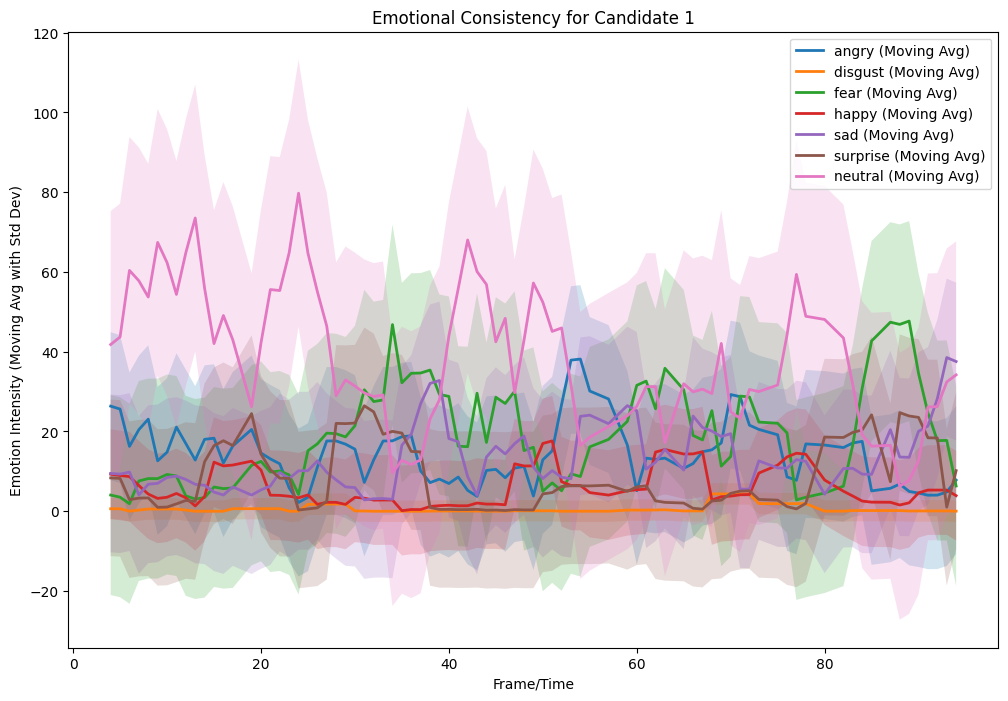

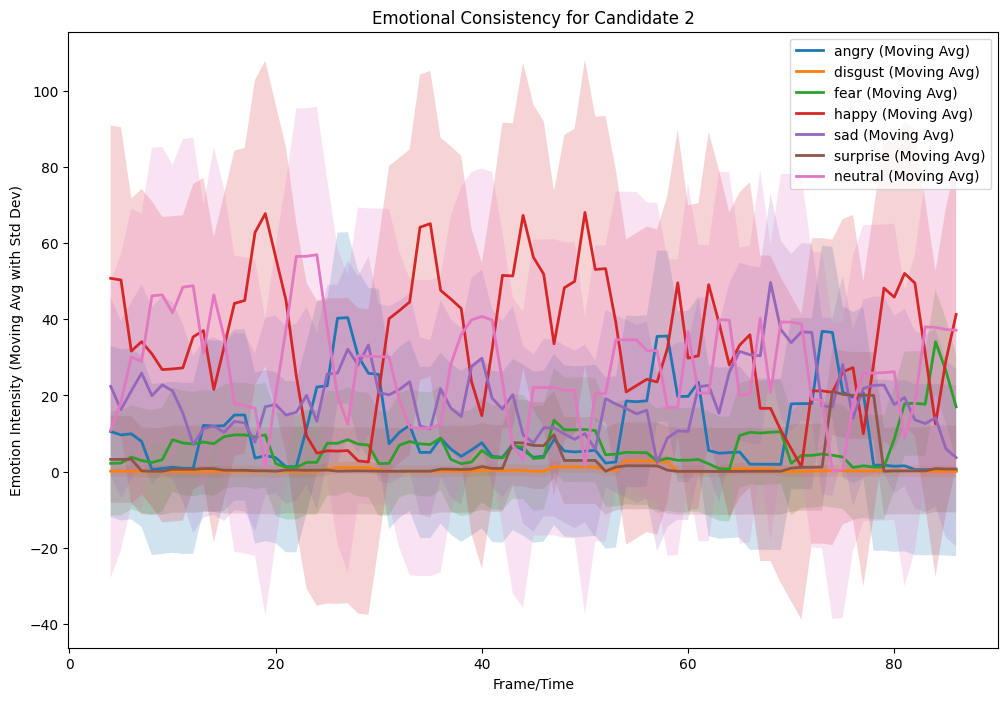

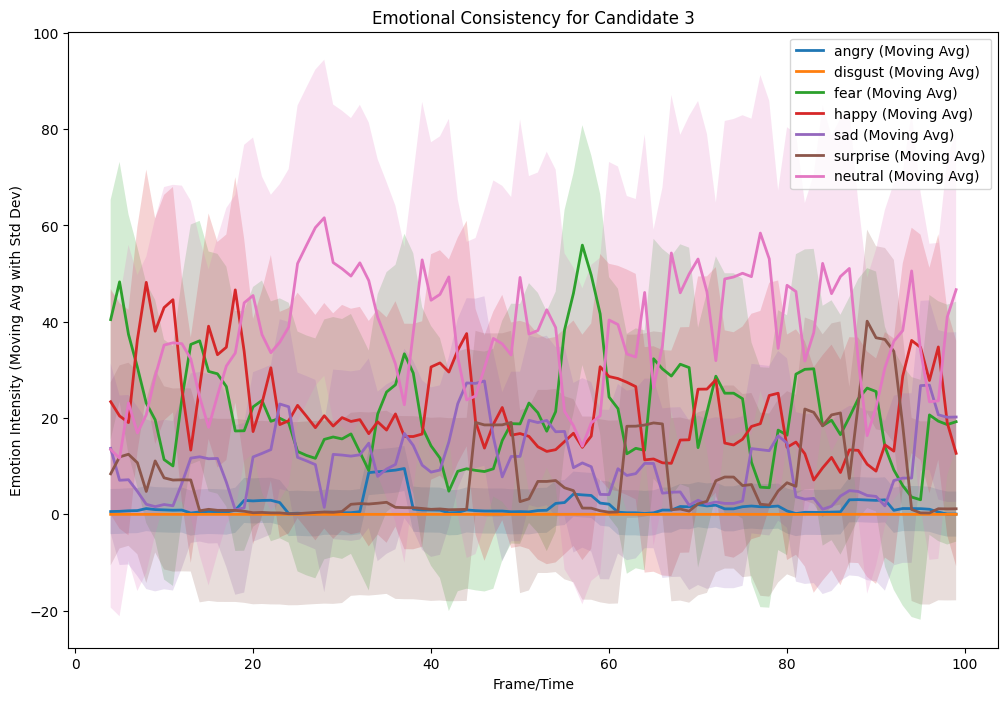

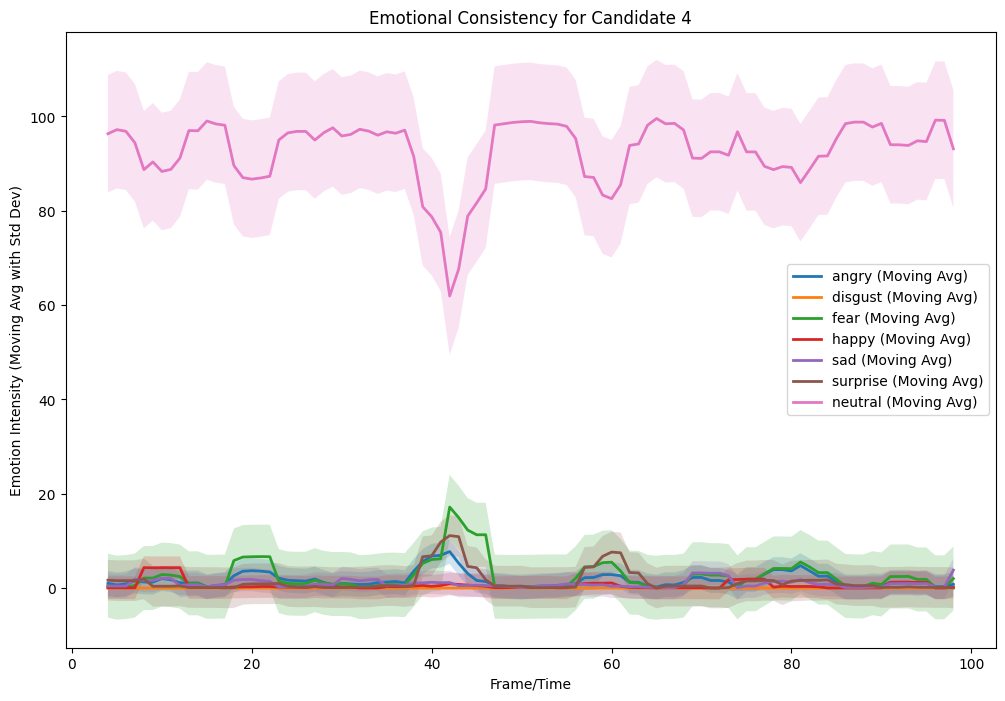

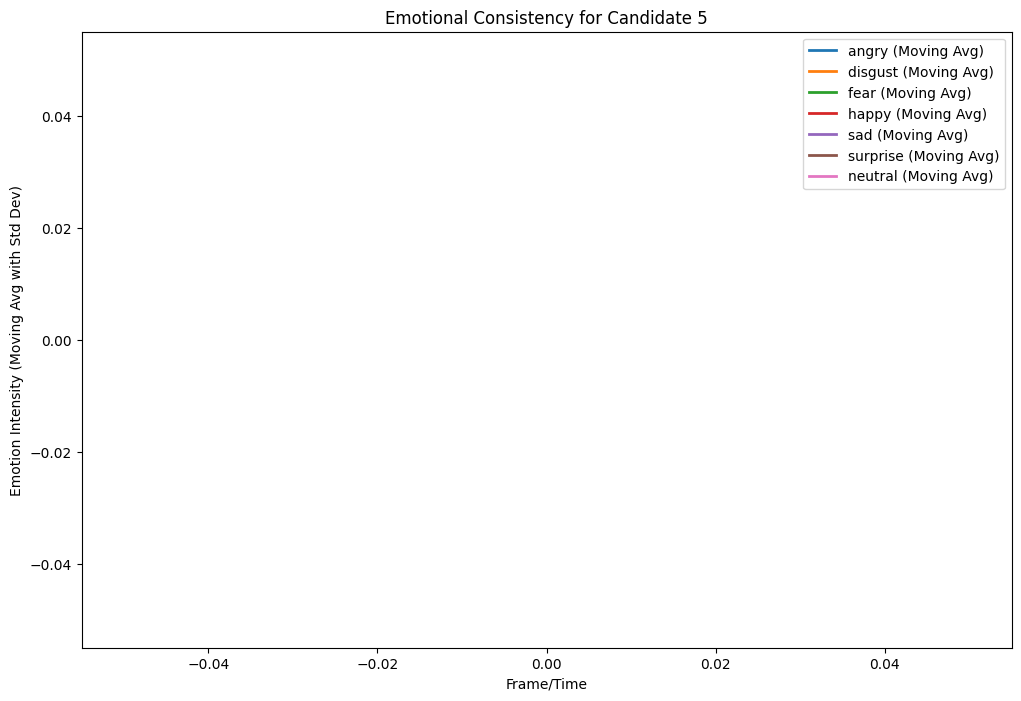

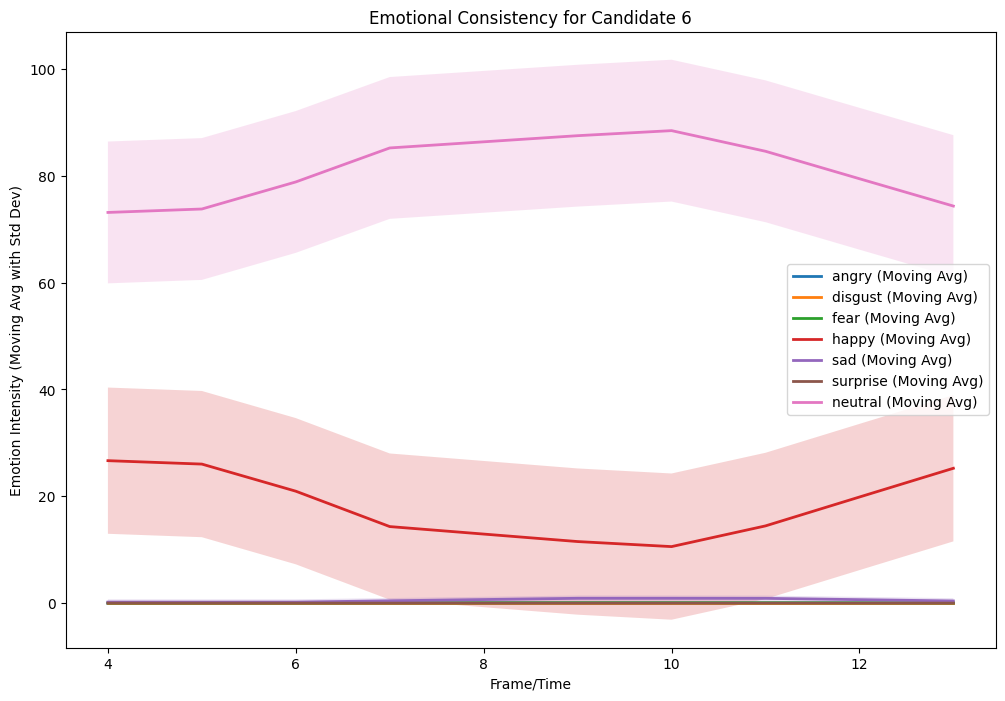

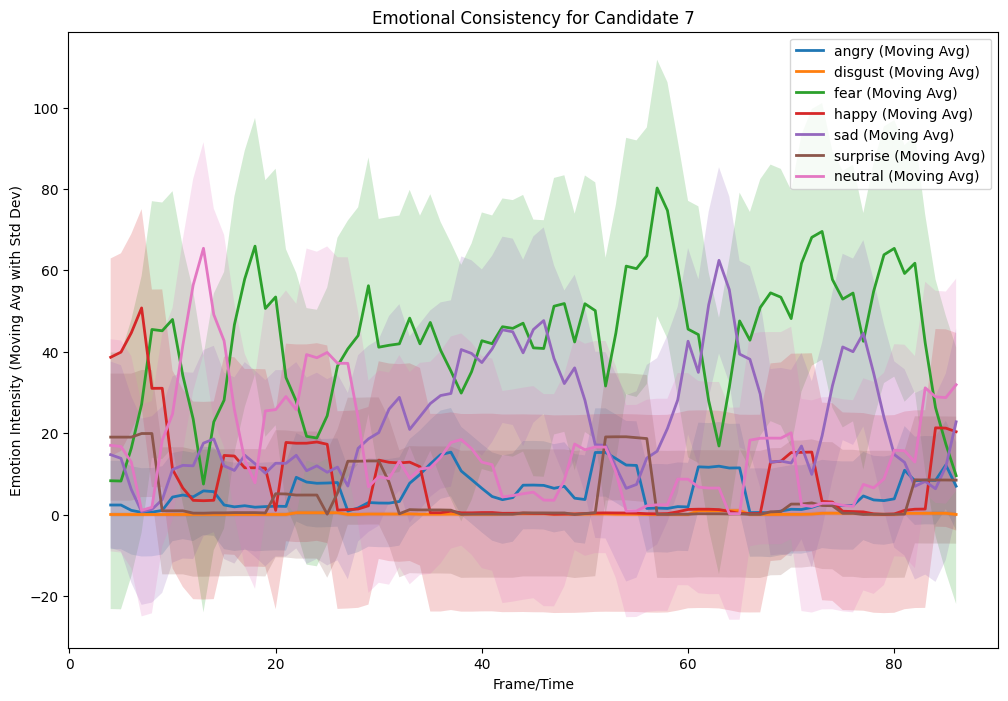

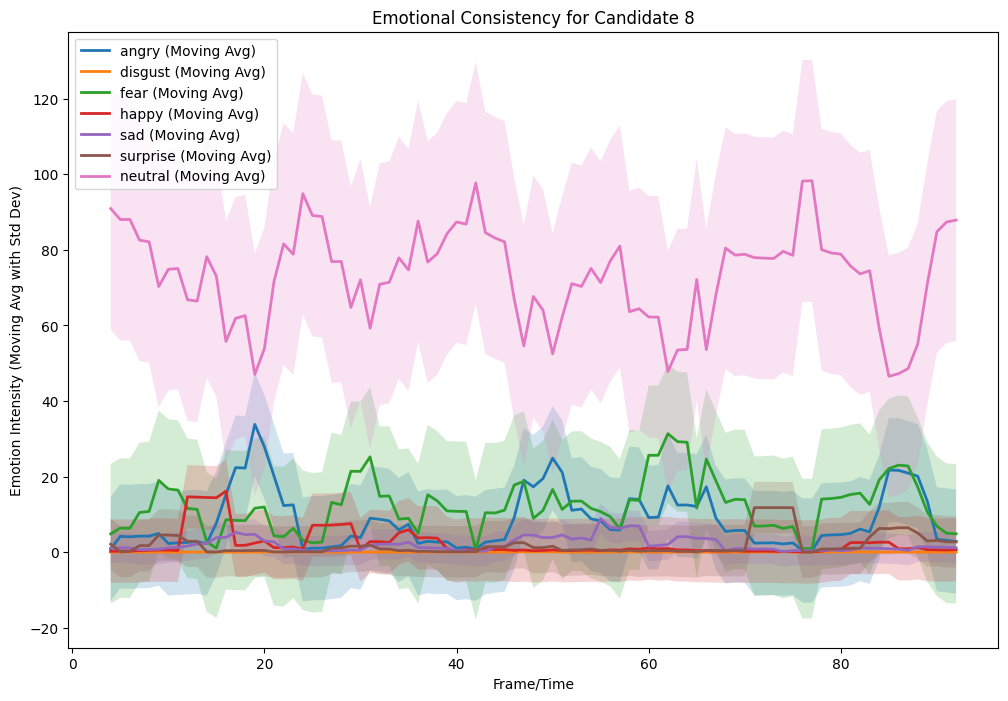

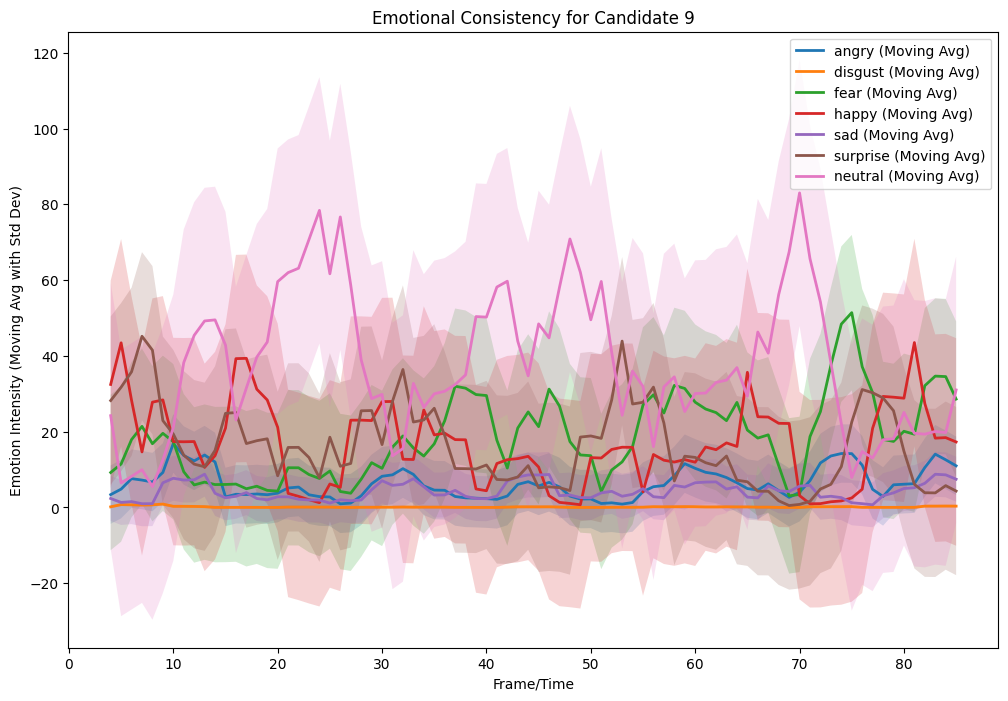

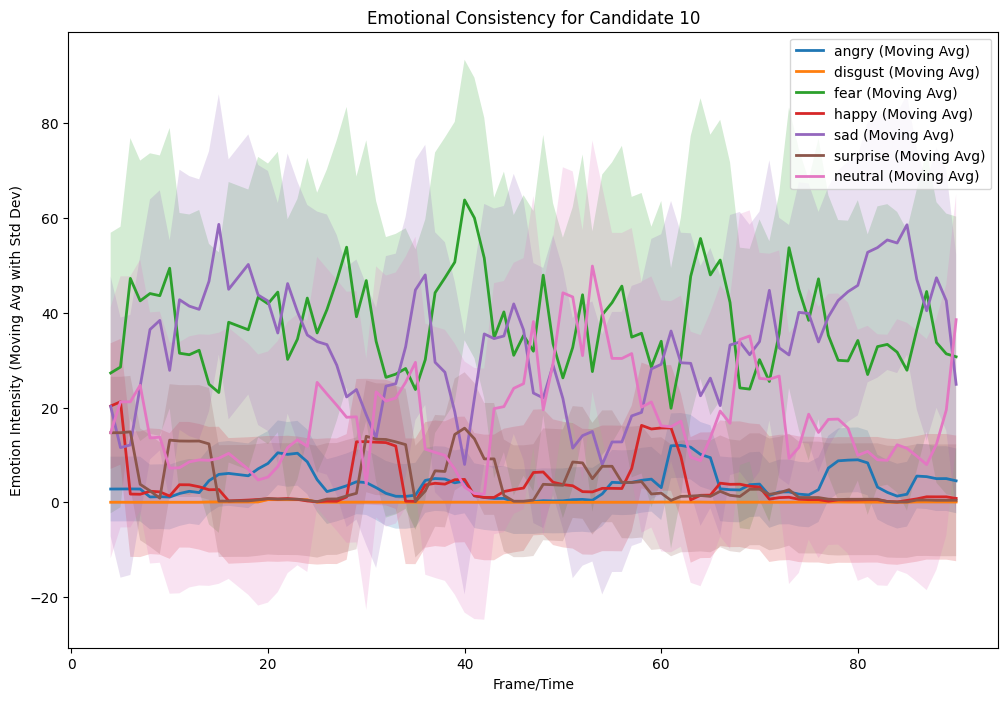

In [ ]:
# Function to analyze emotional consistency and plot standard deviation and moving average
def analyze_and_plot_emotional_consistency(emotion_df, candidate_id):
    # Emotion columns to analyze
    emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

    # Calculate standard deviation for each emotion
    std_dev = emotion_df[emotion_columns].std()

    # Calculate moving average (window size can be adjusted)
    window_size = 5
    moving_avg = emotion_df[emotion_columns].rolling(window=window_size).mean()

    # Emotional transitions (changes in dominant emotion)
    dominant_emotion = emotion_df['dominant_emotion']
    transitions = (dominant_emotion != dominant_emotion.shift()).sum()

    # Plot emotional variability with standard deviation as shaded areas
    plt.figure(figsize=(12, 8))
    for emotion in emotion_columns:
        plt.plot(emotion_df['image_seq'], moving_avg[emotion], label=f'{emotion} (Moving Avg)', linewidth=2)
        # Add shaded area representing ±1 standard deviation around the moving average
        plt.fill_between(
            emotion_df['image_seq'],
            moving_avg[emotion] - std_dev[emotion],
            moving_avg[emotion] + std_dev[emotion],
            alpha=0.2  # Transparency level
        )

    plt.title(f'Emotional Consistency for Candidate {candidate_id}')
    plt.xlabel('Frame/Time')
    plt.ylabel('Emotion Intensity (Moving Avg with Std Dev)')
    plt.legend()
    plt.show()

# Loop through each candidate and analyze & plot emotional consistency
for i in range(1, 11):  # Assuming there are 10 candidates
    emotion_df = globals()[f'emotion_df_{i}']  # Access each candidate's DataFrame
    analyze_and_plot_emotional_consistency(emotion_df, i)


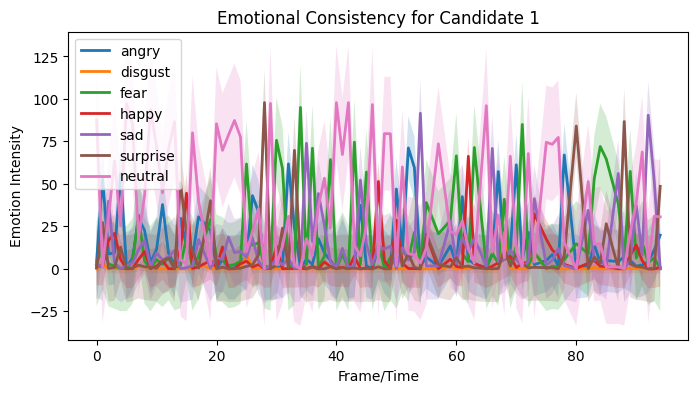

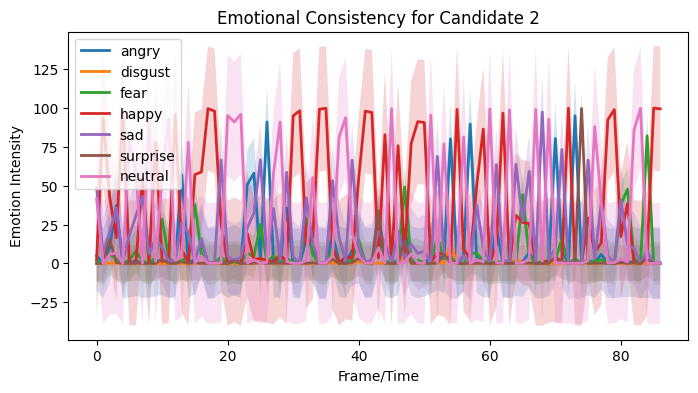

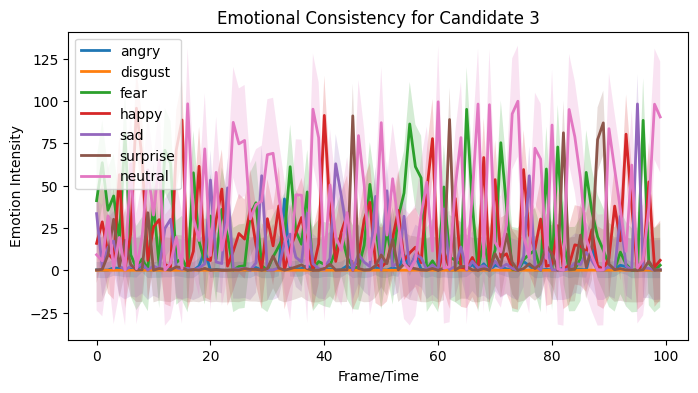

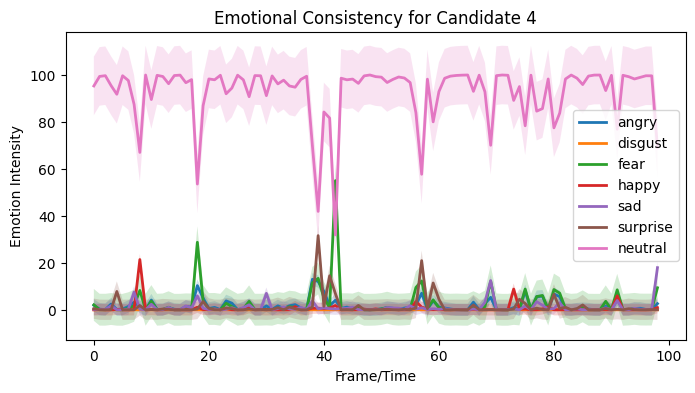

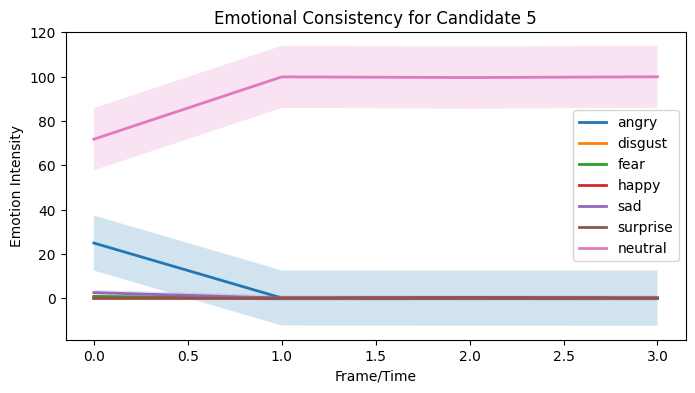

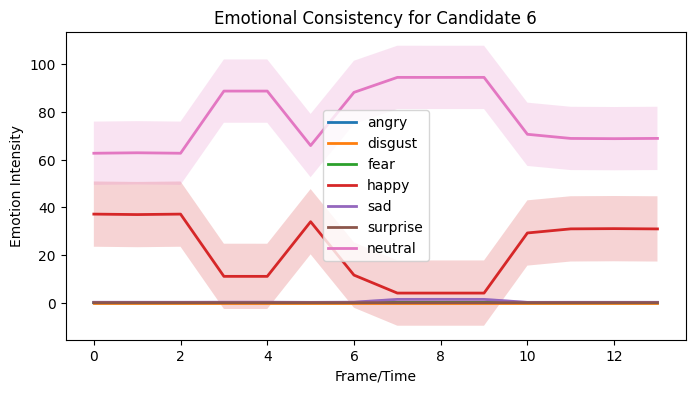

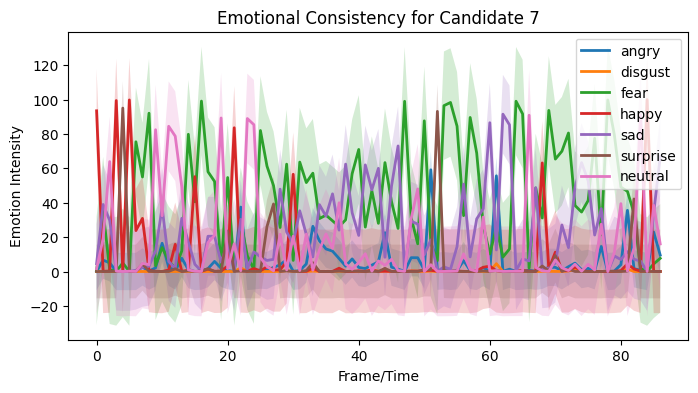

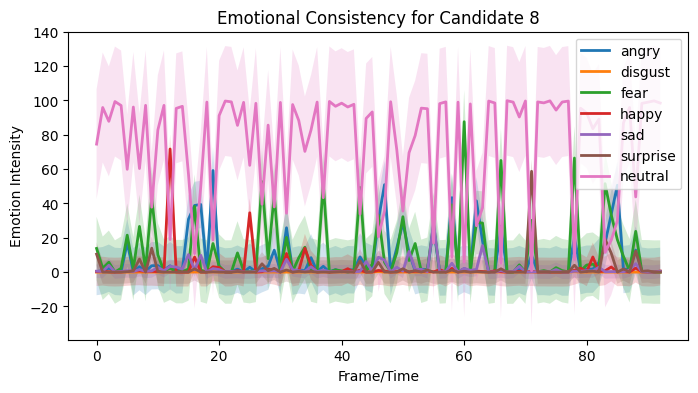

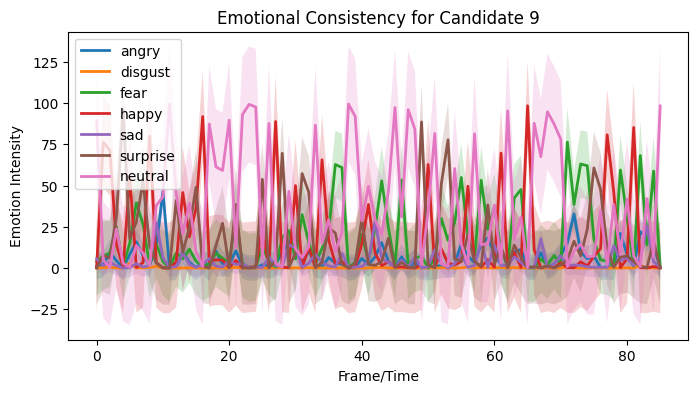

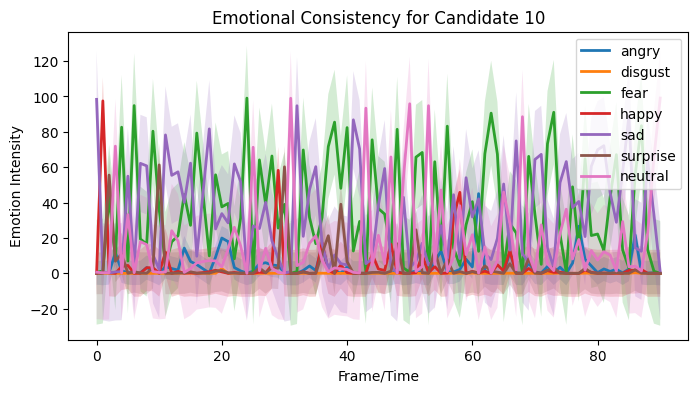

In [ ]:
# Function to analyze emotional consistency and plot raw data with standard deviation shading
def analyze_and_plot_emotional_consistency(emotion_df, candidate_id):
    # Emotion columns to analyze
    emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

    # Calculate standard deviation for each emotion
    std_dev = emotion_df[emotion_columns].std()

    # Plot raw emotional intensity data with standard deviation as shaded areas
    plt.figure(figsize=(8, 4))
    for emotion in emotion_columns:
        plt.plot(emotion_df['image_seq'], emotion_df[emotion], label=f'{emotion}', linewidth=2)
        # Add shaded area representing ±1 standard deviation around the raw emotion data
        plt.fill_between(
            emotion_df['image_seq'],
            emotion_df[emotion] - std_dev[emotion],
            emotion_df[emotion] + std_dev[emotion],
            alpha=0.2  # Transparency level
        )

    plt.title(f'Emotional Consistency for Candidate {candidate_id}')
    plt.xlabel('Frame/Time')
    plt.ylabel('Emotion Intensity')
    plt.legend()
    plt.show()

# Loop through each candidate and analyze & plot emotional consistency
for i in range(1, 11):  # Assuming there are 10 candidates
    emotion_df = globals()[f'emotion_df_{i}']  # Access each candidate's DataFrame
    analyze_and_plot_emotional_consistency(emotion_df, i)


## Looking at the outliers

In [ ]:
import pandas as pd
import plotly.express as px

# List of DataFrames for 10 candidates
dfs = [emotion_df_10, emotion_df_1, emotion_df_2, emotion_df_3, emotion_df_4,
       emotion_df_5, emotion_df_6, emotion_df_7, emotion_df_8, emotion_df_9]

emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for i, df in enumerate(dfs):
    fig = px.histogram(df.melt(id_vars='image_seq', value_vars=emotions),
                       x='value',
                       color='variable',
                       facet_col='variable',
                       title=f'Distribution of Emotions for Candidate {i}',
                       labels={'value': 'Emotion Score'},
                       height=600)
    fig.update_layout(bargap=0.1)
    fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# List of DataFrames for 10 candidates
dfs = [emotion_df_1, emotion_df_2, emotion_df_3, emotion_df_4, emotion_df_5,
       emotion_df_6, emotion_df_7, emotion_df_8, emotion_df_9, emotion_df_10]

emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for i, df in enumerate(dfs, start=1):
    # Melt the dataframe to long format for box plot
    df_long = df.melt(id_vars='image_seq', value_vars=emotions, var_name='Emotion', value_name='Score')

    fig = px.box(df_long, x='Emotion', y='Score',
                 title=f'Box Plot of Emotions for Candidate {i}',
                 labels={'Score': 'Emotion Score'})
    fig.update_layout(boxmode='group')
    fig.show()


## Ruling out Features

### Using Heat Maps

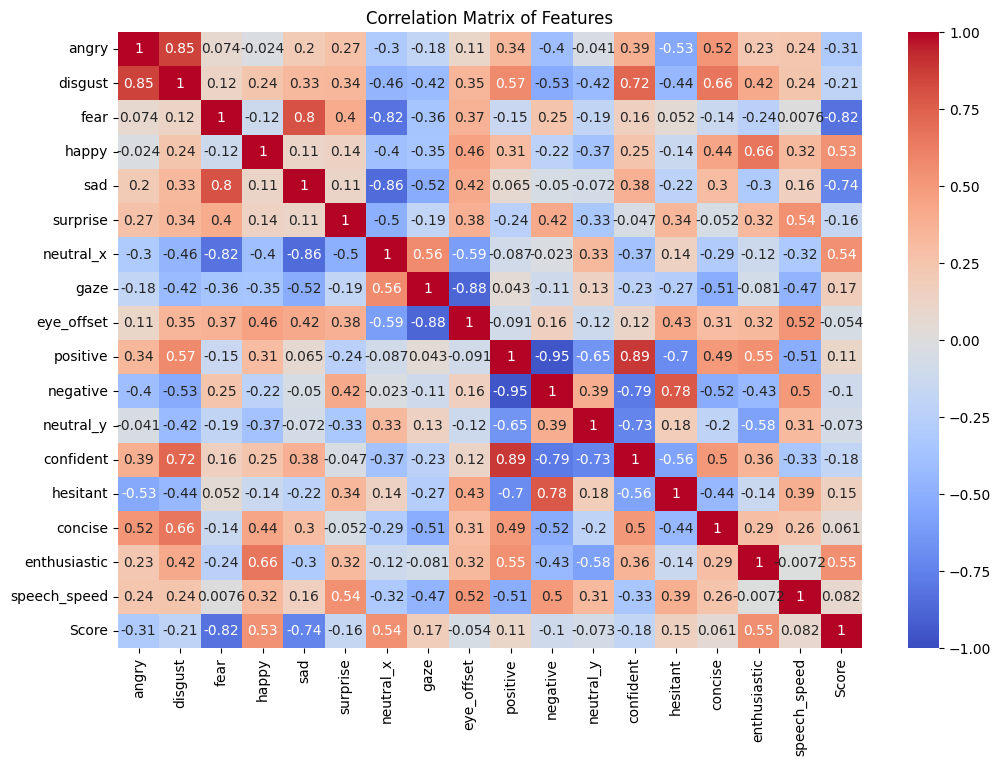

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Assuming 'average_df' is already available and contains your features
# Drop the 'Candidate' column (if present)
df_features = average_df.drop('Candidate', axis=1)

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Visualize the correlation matrix using a heatmap (you can use either Seaborn or Plotly)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.show()


Features to drop due to high correlation: ['disgust', 'neutral_x', 'eye_offset', 'negative', 'confident', 'Score']
Remaining features after reduction: Index(['angry', 'fear', 'happy', 'sad', 'surprise', 'gaze', 'positive',
       'neutral_y', 'hesitant', 'concise', 'enthusiastic', 'speech_speed'],
      dtype='object')


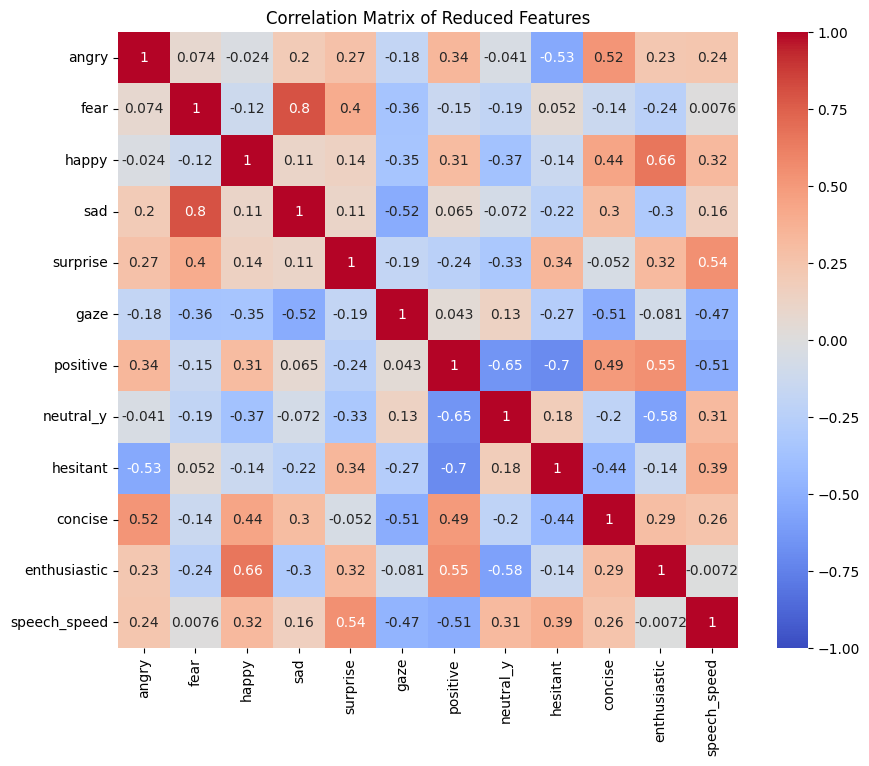

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'average_df' is already available and contains your features
# Drop the 'Candidate' column or any other non-numeric columns
df_features = average_df.drop('Candidate', axis=1)

# Compute the correlation matrix
correlation_matrix = df_features.corr().abs()  # Use absolute values for easier comparison

# Set a threshold for dropping highly correlated features
threshold = 0.8

# Create a mask for the upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with a correlation higher than the threshold
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# Drop those features
df_reduced = df_features.drop(columns=to_drop)

# Display dropped features and remaining features
print("Features to drop due to high correlation:", to_drop)
print("Remaining features after reduction:", df_reduced.columns)

# Compute correlation matrix for the reduced feature set
reduced_correlation_matrix = df_reduced.corr()

# Plot the correlation matrix for the reduced features using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(reduced_correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Reduced Features")
plt.show()


In [ ]:
df_reduced

angry       fear      happy        sad   surprise      gaze  positive  \
0  14.451059  18.382797   5.865318  13.575324   8.744969  0.625000  0.709199   
1  10.395041   6.747536  35.063288  18.558391   2.267330  0.609195  0.722006   
2   1.531082  21.633298  21.428420  10.295898   7.268728  0.450000  0.567257   
3   1.734140   2.602291   0.572650   1.057942   1.403702  0.787879  0.655748   
4   6.261661   0.202875   0.101414   0.654111   0.008069  1.000000  0.630573   
5   0.004150   0.035453  22.363658   0.436512   0.004707  1.000000  0.711182   
6   5.641183  41.652400   8.994113  23.106425   4.081041  0.781609  0.717354   
7   8.115339  11.939264   2.120367   1.955231   1.901795  0.946237  0.605402   
8   6.337654  18.602680  16.734190   4.293063  15.761101  0.965116  0.617353   
9   3.856539  36.143804   4.215283  32.656818   4.330881  0.733333  0.589267   

   neutral_y  hesitant   concise  enthusiastic  speech_speed  
0   0.149586  0.485172  0.429418      0.466497      3.113771  
1   0.170453  0.436158  0.484221      0.516685      3.269092  
2   0.168406  0.604004  0.394715      0.448050      3.385636  
3   0.175110  0.570452  0.403479      0.440626      2.775454  
4   0.182414  0.461488  0.413644      0.378110      2.817341  
5   0.149826  0.490252  0.367792      0.481433      2.583163  
6   0.142414  0.457070  0.398571      0.463940      2.284897  
7   0.202306  0.507622  0.352011      0.437399      2.902953  
8   0.158699  0.538732  0.381809      0.505152      3.329938  
9   0.189785  0.520637  0.385655      0.325507      3.248518

##Results on the basis of Reduced Features

In [ ]:
# Assuming df_reduced is already defined and available

# Define weights for attributes (customize as needed)
weights = {
    'angry': -0.5,       # Negative impact on communication
    'fear': -0.5,        # Negative impact on communication
    'happy': 0.5,        # Positive impact on communication
    'sad': -0.5,         # Negative impact on communication
    'surprise': 0.3,     # Positive impact on communication
    'gaze': 0.2,         # Positive impact on communication (moderate weight)
    'positive': 0.6,     # Strong positive impact on communication
    'neutral_y': 0.1,    # Slight positive impact on communication
    'hesitant': -0.6,    # Strong negative impact on communication
    'concise': 0.5,      # Positive impact on communication
    'enthusiastic': 0.7, # Strong positive impact on communication
    'speech_speed': 0.4  # Positive impact on communication (moderate weight)
}

def calculate_communication_score(row):
    score = sum(row[attr] * weight for attr, weight in weights.items())
    return score

def judge_communication(score):
    if score > 1.0:
        return 'High'
    elif score > 0.0:
        return 'Medium'
    else:
        return 'Low'

def recommend_role(row):
    communication_score = calculate_communication_score(row)

    if communication_score > 1.0:
        return 'Software Engineer'
    elif communication_score > 0.5:
        return 'Data Scientist'
    elif communication_score > 0.2:
        return 'UI/UX Designer'
    elif communication_score > 0.0:
        return 'Business Analyst'
    else:
        return 'NA'

# Apply functions to df_reduced
df_reduced['communication_score'] = df_reduced.apply(calculate_communication_score, axis=1)
df_reduced['communication_skills'] = df_reduced['communication_score'].apply(judge_communication)
df_reduced['recommended_role'] = df_reduced.apply(recommend_role, axis=1)

# Add candidate_id column
df_reduced['candidate_id'] = df_reduced.index + 1

# Reorder columns to have candidate_id first
results_df = df_reduced[['candidate_id', 'communication_skills', 'recommended_role']]

# print(results_df)
results_df

candidate_id communication_skills   recommended_role
0             1                  Low                 NA
1             2                 High  Software Engineer
2             3                  Low                 NA
3             4                  Low                 NA
4             5                  Low                 NA
5             6                 High  Software Engineer
6             7                  Low                 NA
7             8                  Low                 NA
8             9               Medium     Data Scientist
9            10                  Low                 NA

# Skillset and Other Data

In [ ]:
import pandas as pd

# Data for the DataFrame
data = {
    "Serial No.": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Education": [
        "B.Tech in Biotechnology, M.Tech from IIT Kharagpur, Postgraduate Management from IIM Coikode",
        "BBA",
        "B.Tech in Engineering, MBA",
        "Engineering Graduate in Electronics and Communication",
        "Undergraduation in Mass Media, Certifications in Entrepreneurship and Management",
        "First Year MBA (IIM Kashipur)",
        "Undergraduate in Earth Science",
        "PGP Finance (IIM Co-Ecode), CA, CFA Level 1",
        "B.Tech in Agriculture Engineering, M.Tech in Food Process Engineering, MBA (IIM Lucknow)",
        "B.Com Honours"
    ],
    "Experience": [
        "Medical Writer at Ciro Klein Farm, Experience in Drug Safety and Risk Management",
        "Interned at boutique investment bank, Interned at Kabadi Techno",
        "Interned as Sales Associate, Interned in Accounting Firm",
        "Interned at PSK VLSI Design Center, Worked as Academic Advisor, Event Coordinator, Student Leader, Sun NGO Member",
        "Won International Art Competition, Experience in Movie Reviews and Arts",
        "3 years at Deloitte (Consulting), Media and PR Committee Member, Content Writer and Editor",
        "Worked at GIC Re (Retrocession and Reinsurance Underwriting)",
        "Interned at PWC (Statutory Audit), Worked at ITC Limited (Internal Audit)",
        "Co-founded Agritech Startup, Project on Remote Sensing and AI in Agriculture",
        "Interned as Accounting Associate and Tax Associate"
    ],
    "Skillset": [
        "Expertise in Regulatory Affairs, Attention to Detail, Research Work",
        "Finance, Business Model Preparation",
        "Sales, Accounting, Content Creation",
        "Data Science, Consulting, Event Coordination",
        "Art, Writing, Creativity",
        "Analytics, Consulting, Strategy, PR Management",
        "Reinsurance, Market Understanding, Communication",
        "Analytical Skills, Financial Analysis, Auditing",
        "Agritech, Remote Sensing, IoT, AI, Entrepreneurship",
        "Accounting, Taxation, Leadership"
    ],
    "Achievements": [
        "Best Research Award from IIT Kharagpur",
        "Developed Venture Network Framework",
        "Guitar Player, YouTube Channel",
        "Event Coordinator, Student Leader, Sun NGO Member",
        "International Art Competition Winner",
        "Consulting Experience at Deloitte",
        "Experience at GIC Re",
        "CA and CFA Level 1 Cleared",
        "Agritech Startup Co-founder",
        "Captain of Student Committee, Best Student Award"
    ],
    "Extracurricular Activities": [
        "Baking, Traveling",
        "None mentioned",
        "Music, Traveling, Learning",
        "Adaptive Learning, Exploring",
        "Drawing, Painting, Singing, Instagram Reviews",
        "Media and PR Activities",
        "None mentioned",
        "None mentioned",
        "None mentioned",
        "Bad Scouts and Guides"
    ],
    "Hobbies/Interests": [
        "Baking, Traveling",
        "None mentioned",
        "Music, Traveling, Learning",
        "Adaptive Learning, Exploring",
        "Art, Mental Health Awareness",
        "Learning, Analytics",
        "Exploring new experiences",
        "Applying skills in EdTech and creating value",
        "Working in AI-driven challenging areas",
        "Reading, Creative Exploration"
    ],
    "Career Goals": [
        "Short Term: Apply skills, Long Term: Value Creation",
        "Seeking challenging role in Business Development and Strategy",
        "Seeking challenging and rewarding role",
        "Utilizing knowledge and experience to help company flourish",
        "Applying AI to aid neurodevelopmental disorders",
        "Interest in Analytics and Mental Health",
        "Interest in AI-driven social impact",
        "Applying skills in EdTech and creating value",
        "Working in AI-driven challenging areas",
        "Short Term: Apply skills, Long Term: Value Creation"
    ],
    # "Roles Applying For": [
    #     "Regulatory Affairs Specialist, Research Analyst",
    #     "Finance Manager, Business Development Manager",
    #     "Sales Manager, Financial Analyst",
    #     "Data Scientist, Consultant, Event Manager",
    #     "Art Director, Mental Health Advocate, Social Media Influencer",
    #     "Analytics Consultant, PR Manager, Content Strategist",
    #     "Reinsurance Analyst, Market Analyst",
    #     "Financial Auditor, Internal Auditor, Finance Consultant",
    #     "Agritech Entrepreneur, AI Specialist, Project Manager",
    #     "Accounting Specialist, Tax Consultant"
    # ],
    "Suitable Roles": [
        "Regulatory Affairs Specialist, Research Analyst",
        "Finance Manager, Business Development Manager",
        "Sales Manager, Financial Analyst, Content Creator",
        "Data Scientist, Consultant, Event Coordinator",
        "Art Director, Mental Health Advocate, Social Media Influencer",
        "Analytics Consultant, PR Manager, Content Strategist",
        "Reinsurance Analyst, Market Analyst",
        "Financial Auditor, Internal Auditor, Finance Consultant",
        "Agritech Specialist, AI Project Manager, Business Development Manager",
        "Accounting Specialist, Tax Consultant"
    ]
}

# Create the DataFrame
transcript_df = pd.DataFrame(data)

# Display the DataFrame
# print(df)
transcript_df


Serial No.                                          Education  \
0           1  B.Tech in Biotechnology, M.Tech from IIT Khara...   
1           2                                                BBA   
2           3                         B.Tech in Engineering, MBA   
3           4  Engineering Graduate in Electronics and Commun...   
4           5  Undergraduation in Mass Media, Certifications ...   
5           6                      First Year MBA (IIM Kashipur)   
6           7                     Undergraduate in Earth Science   
7           8        PGP Finance (IIM Co-Ecode), CA, CFA Level 1   
8           9  B.Tech in Agriculture Engineering, M.Tech in F...   
9          10                                      B.Com Honours   

                                          Experience  \
0  Medical Writer at Ciro Klein Farm, Experience ...   
1  Interned at boutique investment bank, Interned...   
2  Interned as Sales Associate, Interned in Accou...   
3  Interned at PSK VLSI Design Center, Worked as ...   
4  Won International Art Competition, Experience ...   
5  3 years at Deloitte (Consulting), Media and PR...   
6  Worked at GIC Re (Retrocession and Reinsurance...   
7  Interned at PWC (Statutory Audit), Worked at I...   
8  Co-founded Agritech Startup, Project on Remote...   
9  Interned as Accounting Associate and Tax Assoc...   

                                            Skillset  \
0  Expertise in Regulatory Affairs, Attention to ...   
1                Finance, Business Model Preparation   
2                Sales, Accounting, Content Creation   
3       Data Science, Consulting, Event Coordination   
4                           Art, Writing, Creativity   
5     Analytics, Consulting, Strategy, PR Management   
6   Reinsurance, Market Understanding, Communication   
7    Analytical Skills, Financial Analysis, Auditing   
8  Agritech, Remote Sensing, IoT, AI, Entrepreneu...   
9                   Accounting, Taxation, Leadership   

                                        Achievements  \
0             Best Research Award from IIT Kharagpur   
1                Developed Venture Network Framework   
2                     Guitar Player, YouTube Channel   
3  Event Coordinator, Student Leader, Sun NGO Member   
4               International Art Competition Winner   
5                  Consulting Experience at Deloitte   
6                               Experience at GIC Re   
7                         CA and CFA Level 1 Cleared   
8                        Agritech Startup Co-founder   
9   Captain of Student Committee, Best Student Award   

                      Extracurricular Activities  \
0                              Baking, Traveling   
1                                 None mentioned   
2                     Music, Traveling, Learning   
3                   Adaptive Learning, Exploring   
4  Drawing, Painting, Singing, Instagram Reviews   
5                        Media and PR Activities   
6                                 None mentioned   
7                                 None mentioned   
8                                 None mentioned   
9                          Bad Scouts and Guides   

                              Hobbies/Interests  \
0                             Baking, Traveling   
1                                None mentioned   
2                    Music, Traveling, Learning   
3                  Adaptive Learning, Exploring   
4                  Art, Mental Health Awareness   
5                           Learning, Analytics   
6                     Exploring new experiences   
7  Applying skills in EdTech and creating value   
8        Working in AI-driven challenging areas   
9                 Reading, Creative Exploration   

                                        Career Goals  \
0  Short Term: Apply skills, Long Term: Value Cre...   
1  Seeking challenging role in Business Developme...   
2             Seeking challenging and rewarding role   
3  Utilizing knowledge and experience to hel

##Other Approaches

In [ ]:
# Function to suggest jobs based on all soft skills
def suggest_job(row):
    # Define job recommendations based on soft skill thresholds
    if row['confidence'] > 0.7 and row['enthusiasm'] > 0.7 and row['customer_focus'] > 0.7:
        return "Sales/Marketing"
    elif row['leadership'] > 0.7 and row['confidence'] > 0.7 and row['emotional_intelligence'] > 0.6:
        return "Leadership Role"
    elif row['attention_to_detail'] > 0.7 and row['resilience'] > 0.6 and row['adaptability'] > 0.6:
        return "Analyst"
    elif row['customer_focus'] > 0.6 and row['resilience'] > 0.6 and row['emotional_intelligence'] > 0.6:
        return "Customer Support"
    elif row['enthusiasm'] > 0.7 and row['adaptability'] > 0.6 and row['attention_to_detail'] > 0.6:
        return "Creative/Design"
    elif row['leadership'] > 0.7 and row['attention_to_detail'] > 0.7 and row['adaptability'] > 0.6:
        return "Operations/Project Management"
    else:
        return "General Role"

# Apply the job suggestion function to each row in the soft_skills_df
soft_skills_df['job_suggestion'] = soft_skills_df.apply(suggest_job, axis=1)

# Display the updated DataFrame with job suggestions
# print(soft_skills_df[['confidence', 'enthusiasm', 'leadership', 'customer_focus', 'job_suggestion']])
soft_skills_df

confidence  enthusiasm  emotional_intelligence  resilience  assertiveness  \
0    1.572539    2.698836               11.540390   16.459808       6.723947   
1    7.424797   14.396923               21.981844   11.471878       8.612894   
2    4.619834    8.875960               16.139905   17.098338       3.384334   
3    0.494937    0.557972                1.240315    1.984551       0.990618   
4    0.390294    0.343171                0.903540    0.383370       2.738841   
5    4.873271    9.303248                9.083922    0.195877       2.925622   
6    2.200224    3.952033               19.424171   34.234010       3.576607   
7    0.787466    1.160987                4.634103    7.945651       3.718615   
8    3.703124    7.030428               12.335896   12.878833       4.756936   
9    1.194626    1.960545               19.097574   34.749010       2.259391   

   attention_to_detail  adaptability  leadership  customer_focus  \
0             0.457295      5.306816    4.711392        0.636388   
1             0.460190      1.428579   11.504909        0.660410   
2             0.499360      4.428599    6.130147        0.531495   
3             0.486965      0.912265    0.774295        0.591212   
4             0.437566      0.077807    1.541006        0.554834   
5             0.429022      0.062755    6.114435        0.642258   
6             0.427820      2.505590    3.764320        0.641330   
7             0.429817      1.221999    2.439801        0.555001   
8             0.460270      9.520140    5.893682        0.583692   
9             0.453146      2.674442    2.109968        0.510139   

    job_suggestion  
0  Leadership Role  
1  Leadership Role  
2  Leadership Role  
3     General Role  
4     General Role  
5  Leadership Role  
6  Leadership Role  
7  Leadership Role  
8  Leadership Role  
9  Leadership Role

In [ ]:


# Assuming df_reduced already exists and contains emotion and behavioral scores for 10 candidates
# Columns: 'angry', 'fear', 'happy', 'sad', 'surprise', 'gaze', 'positive', 'neutral_y', 'hesitant', 'concise', 'enthusiastic', 'speech_speed'

# Function to calculate soft skills for each candidate
def calculate_soft_skills(df):
    soft_skills = []

    # Define weights for each soft skill based on the previous explanation
    for i, row in df.iterrows():
        # Calculate Confidence (C)
        confidence = 0.5 * row['positive'] + 0.3 * row['neutral_y'] + 0.2 * row['happy']

        # Calculate Enthusiasm (E)
        enthusiasm = 0.4 * row['happy'] + 0.3 * row['positive'] + 0.3 * row['enthusiastic']

        # Calculate Emotional Intelligence (EI)
        emotional_intelligence = 0.4 * row['happy'] + 0.3 * row['sad'] + 0.2 * row['fear'] + 0.1 * row['angry']

        # Calculate Resilience (R)
        resilience = 0.6 * row['fear'] + 0.4 * row['sad']

        # Calculate Assertiveness (A)
        assertiveness = 0.4 * row['angry'] + 0.6 * confidence

        # Calculate Attention to Detail (AD)
        attention_to_detail = 0.5 * row['hesitant'] + 0.5 * row['concise']

        # Calculate Adaptability (AD)
        adaptability = 0.6 * row['surprise'] + 0.4 * row['neutral_y']

        # Calculate Leadership (L)
        leadership = 0.5 * assertiveness + 0.5 * enthusiasm

        # Calculate Customer Focus (CF)
        customer_focus = 0.7 * row['positive'] + 0.3 * row['enthusiastic']

        # Store the calculated soft skills in a dictionary
        soft_skills_dict = {
            'confidence': confidence,
            'enthusiasm': enthusiasm,
            'emotional_intelligence': emotional_intelligence,
            'resilience': resilience,
            'assertiveness': assertiveness,
            'attention_to_detail': attention_to_detail,
            'adaptability': adaptability,
            'leadership': leadership,
            'customer_focus': customer_focus
        }

        # Append the dictionary to the list
        soft_skills.append(soft_skills_dict)

    # Convert the list of dictionaries to a DataFrame
    soft_skills_df = pd.DataFrame(soft_skills)

    return soft_skills_df

# Call the function and calculate soft skills for each candidate in the DataFrame
soft_skills_df = calculate_soft_skills(df_reduced)

# Display the soft skills DataFrame
soft_skills_df


confidence  enthusiasm  emotional_intelligence  resilience  assertiveness  \
0    1.572539    2.698836               11.540390   16.459808       6.723947   
1    7.424797   14.396923               21.981844   11.471878       8.612894   
2    4.619834    8.875960               16.139905   17.098338       3.384334   
3    0.494937    0.557972                1.240315    1.984551       0.990618   
4    0.390294    0.343171                0.903540    0.383370       2.738841   
5    4.873271    9.303248                9.083922    0.195877       2.925622   
6    2.200224    3.952033               19.424171   34.234010       3.576607   
7    0.787466    1.160987                4.634103    7.945651       3.718615   
8    3.703124    7.030428               12.335896   12.878833       4.756936   
9    1.194626    1.960545               19.097574   34.749010       2.259391   

   attention_to_detail  adaptability  leadership  customer_focus  
0             0.457295      5.306816    4.711392        0.636388  
1             0.460190      1.428579   11.504909        0.660410  
2             0.499360      4.428599    6.130147        0.531495  
3             0.486965      0.912265    0.774295        0.591212  
4             0.437566      0.077807    1.541006        0.554834  
5             0.429022      0.062755    6.114435        0.642258  
6             0.427820      2.505590    3.764320        0.641330  
7             0.429817      1.221999    2.439801        0.555001  
8             0.460270      9.520140    5.893682        0.583692  
9             0.453146      2.674442    2.109968        0.510139

In [ ]:
# Normalize soft skill scores using min-max normalization
def normalize_skills(df):
    normalized_df = df.copy()
    for column in df.columns:
        if column != 'job_suggestion':  # Skip the job suggestion column
            min_value = df[column].min()
            max_value = df[column].max()
            normalized_df[column] = (df[column] - min_value) / (max_value - min_value)  # Min-Max Scaling
    return normalized_df

# Apply normalization
soft_skills_normalized_df = normalize_skills(soft_skills_df)

# Display normalized soft skills
# print()
soft_skills_normalized_df

confidence  enthusiasm  emotional_intelligence  resilience  assertiveness  \
0    0.168064    0.167618                0.504635    0.470693       0.752181   
1    1.000000    1.000000                1.000000    0.326338       1.000000   
2    0.601257    0.607154                0.722846    0.489173       0.314042   
3    0.014876    0.015284                0.015977    0.051766       0.000000   
4    0.000000    0.000000                0.000000    0.005426       0.229357   
5    0.637284    0.637558                0.388095    0.000000       0.253862   
6    0.257293    0.256790                0.878659    0.985095       0.339267   
7    0.056461    0.058192                0.176986    0.224286       0.357898   
8    0.470940    0.475834                0.542376    0.367057       0.494120   
9    0.114341    0.115085                0.863164    1.000000       0.166456   

   attention_to_detail  adaptability  leadership  customer_focus  \
0             0.412015      0.554494    0.366903        0.840145   
1             0.452470      0.144419    1.000000        1.000000   
2             1.000000      0.461633    0.499119        0.142115   
3             0.826746      0.089825    0.000000        0.539509   
4             0.136233      0.001592    0.071451        0.297428   
5             0.016800      0.000000    0.497655        0.879202   
6             0.000000      0.258299    0.278644        0.873027   
7             0.027908      0.122576    0.155211        0.298542   
8             0.453596      1.000000    0.477082        0.489472   
9             0.354012      0.276153    0.124473        0.000000   

    job_suggestion  
0  Leadership Role  
1  Leadership Role  
2  Leadership Role  
3     General Role  
4     General Role  
5  Leadership Role  
6  Leadership Role  
7  Leadership Role  
8  Leadership Role  
9  Leadership Role

In [ ]:
# Function to suggest jobs based on normalized soft skills
def suggest_job(row):
    # Define job recommendations based on normalized soft skill thresholds
    if row['confidence'] > 0.6 and row['enthusiasm'] > 0.6 and row['customer_focus'] > 0.6:
        return "Sales/Marketing"
    elif row['leadership'] > 0.6 and row['confidence'] > 0.6 and row['emotional_intelligence'] > 0.5:
        return "Leadership Role"
    elif row['attention_to_detail'] > 0.6 and row['resilience'] > 0.5 and row['adaptability'] > 0.5:
        return "Analyst"
    elif row['customer_focus'] > 0.5 and row['resilience'] > 0.5 and row['emotional_intelligence'] > 0.5:
        return "Customer Support"
    elif row['enthusiasm'] > 0.6 and row['adaptability'] > 0.5 and row['attention_to_detail'] > 0.5:
        return "Creative/Design"
    elif row['leadership'] > 0.6 and row['attention_to_detail'] > 0.6 and row['adaptability'] > 0.5:
        return "Operations/Project Management"
    else:
        return "General Role"

# Apply the job suggestion function to the normalized soft skills DataFrame
soft_skills_normalized_df['job_suggestion'] = soft_skills_normalized_df.apply(suggest_job, axis=1)

# Display the updated DataFrame with normalized soft skills and job suggestions
# print(soft_skills_normalized_df[['confidence', 'enthusiasm', 'leadership', 'customer_focus', 'job_suggestion']])


In [ ]:
soft_skills_normalized_df

confidence  enthusiasm  emotional_intelligence  resilience  assertiveness  \
0    0.168064    0.167618                0.504635    0.470693       0.752181   
1    1.000000    1.000000                1.000000    0.326338       1.000000   
2    0.601257    0.607154                0.722846    0.489173       0.314042   
3    0.014876    0.015284                0.015977    0.051766       0.000000   
4    0.000000    0.000000                0.000000    0.005426       0.229357   
5    0.637284    0.637558                0.388095    0.000000       0.253862   
6    0.257293    0.256790                0.878659    0.985095       0.339267   
7    0.056461    0.058192                0.176986    0.224286       0.357898   
8    0.470940    0.475834                0.542376    0.367057       0.494120   
9    0.114341    0.115085                0.863164    1.000000       0.166456   

   attention_to_detail  adaptability  leadership  customer_focus  \
0             0.412015      0.554494    0.366903        0.840145   
1             0.452470      0.144419    1.000000        1.000000   
2             1.000000      0.461633    0.499119        0.142115   
3             0.826746      0.089825    0.000000        0.539509   
4             0.136233      0.001592    0.071451        0.297428   
5             0.016800      0.000000    0.497655        0.879202   
6             0.000000      0.258299    0.278644        0.873027   
7             0.027908      0.122576    0.155211        0.298542   
8             0.453596      1.000000    0.477082        0.489472   
9             0.354012      0.276153    0.124473        0.000000   

     job_suggestion  
0      General Role  
1   Sales/Marketing  
2      General Role  
3      General Role  
4      General Role  
5   Sales/Marketing  
6  Customer Support  
7      General Role  
8      General Role  
9      General Role

In [ ]:
# Binning soft skills into categories (low, medium, high)
def categorize_soft_skills(row):
    categories = {}

    for skill in ['confidence', 'enthusiasm', 'emotional_intelligence', 'resilience', 'assertiveness',
                  'attention_to_detail', 'adaptability', 'leadership', 'customer_focus']:
        if row[skill] <= 0.33:  # Low range
            categories[skill] = 'Low'
        elif row[skill] <= 0.66:  # Medium range
            categories[skill] = 'Medium'
        else:  # High range
            categories[skill] = 'High'

    return categories

# Apply the function to categorize the soft skills
soft_skills_normalized_df = soft_skills_df.copy()
soft_skills_normalized_df = soft_skills_normalized_df.apply(categorize_soft_skills, axis=1, result_type='expand')

# Display the categorized soft skills
print(soft_skills_normalized_df)


  confidence enthusiasm emotional_intelligence resilience assertiveness  \
0       High       High                   High       High          High   
1       High       High                   High       High          High   
2       High       High                   High       High          High   
3     Medium     Medium                   High       High          High   
4     Medium     Medium                   High     Medium          High   
5       High       High                   High        Low          High   
6       High       High                   High       High          High   
7       High       High                   High       High          High   
8       High       High                   High       High          High   
9       High       High                   High       High          High   

  attention_to_detail adaptability leadership customer_focus  
0              Medium         High       High         Medium  
1              Medium         High       High   

In [ ]:
# Function to suggest jobs based on soft skill categories
def suggest_job_v2(row):
    # Sales/Marketing roles require high enthusiasm, customer focus, and confidence
    if row['confidence'] == 'High' and row['enthusiasm'] == 'High' and row['customer_focus'] == 'High':
        return "Sales/Marketing"

    # Leadership roles require high leadership and confidence, with at least medium emotional intelligence
    elif row['leadership'] == 'High' and row['confidence'] == 'High' and row['emotional_intelligence'] != 'Low':
        return "Leadership Role"

    # Analyst roles require high attention to detail and resilience
    elif row['attention_to_detail'] == 'High' and row['resilience'] == 'High':
        return "Analyst"

    # Customer Support roles require high customer focus and medium/high emotional intelligence
    elif row['customer_focus'] == 'High' and row['emotional_intelligence'] != 'Low':
        return "Customer Support"

    # Creative roles need high enthusiasm and adaptability
    elif row['enthusiasm'] == 'High' and row['adaptability'] == 'High':
        return "Creative/Design"

    # Consulting roles require high confidence, assertiveness, and adaptability
    elif row['confidence'] == 'High' and row['assertiveness'] == 'High' and row['adaptability'] != 'Low':
        return "Consulting"

    # Engineering roles need high attention to detail and resilience, with at least medium adaptability
    elif row['attention_to_detail'] == 'High' and row['resilience'] == 'High' and row['adaptability'] != 'Low':
        return "Engineering"

    # Human Resources roles require high emotional intelligence, customer focus, and adaptability
    elif row['emotional_intelligence'] == 'High' and row['customer_focus'] == 'High' and row['adaptability'] == 'High':
        return "Human Resources"

    # Operations/Project Management requires high leadership and attention to detail
    elif row['leadership'] == 'High' and row['attention_to_detail'] == 'High':
        return "Operations/Project Management"

    # Default to General Role if no specific match
    else:
        return "General Role"

# Apply the new job suggestion function
soft_skills_normalized_df['job_suggestion'] = soft_skills_normalized_df.apply(suggest_job_v2, axis=1)

# Display the final DataFrame with soft skills and job suggestions
# print([['confidence', 'enthusiasm', 'leadership', 'customer_focus', 'job_suggestion']])
soft_skills_normalized_df

confidence enthusiasm emotional_intelligence resilience assertiveness  \
0       High       High                   High       High          High   
1       High       High                   High       High          High   
2       High       High                   High       High          High   
3     Medium     Medium                   High       High          High   
4     Medium     Medium                   High     Medium          High   
5       High       High                   High        Low          High   
6       High       High                   High       High          High   
7       High       High                   High       High          High   
8       High       High                   High       High          High   
9       High       High                   High       High          High   

  attention_to_detail adaptability leadership customer_focus   job_suggestion  
0              Medium         High       High         Medium  Leadership Role  
1              Medium         High       High           High  Sales/Marketing  
2              Medium         High       High         Medium  Leadership Role  
3              Medium         High       High         Medium     General Role  
4              Medium          Low       High         Medium     General Role  
5              Medium          Low       High         Medium  Leadership Role  
6              Medium         High       High         Medium  Leadership Role  
7              Medium         High       High         Medium  Leadership Role  
8              Medium         High       High         Medium  Leadership Role  
9              Medium         High       High         Medium  Leadership Role

In [ ]:
# Function to suggest multiple jobs based on soft skill categories
def suggest_jobs(row):
    roles = []

    # Sales/Marketing roles require high enthusiasm, customer focus, and confidence
    if row['confidence'] == 'High' and row['enthusiasm'] == 'High' and row['customer_focus'] == 'High':
        roles.append("Sales/Marketing")

    # Leadership roles require high leadership and confidence, with at least medium emotional intelligence
    if row['leadership'] == 'High' and row['confidence'] == 'High' and row['emotional_intelligence'] != 'Low':
        roles.append("Leadership Role")

    # Analyst roles require high attention to detail and resilience
    if row['attention_to_detail'] == 'High' and row['resilience'] == 'High':
        roles.append("Analyst")

    # Customer Support roles require high customer focus and medium/high emotional intelligence
    if row['customer_focus'] == 'High' and row['emotional_intelligence'] != 'Low':
        roles.append("Customer Support")

    # Creative roles need high enthusiasm and adaptability
    if row['enthusiasm'] == 'High' and row['adaptability'] == 'High':
        roles.append("Creative/Design")

    # Consulting roles require high confidence, assertiveness, and adaptability
    if row['confidence'] == 'High' and row['assertiveness'] == 'High' and row['adaptability'] != 'Low':
        roles.append("Consulting")

    # Engineering roles need high attention to detail and resilience, with at least medium adaptability
    if row['attention_to_detail'] == 'High' and row['resilience'] == 'High' and row['adaptability'] != 'Low':
        roles.append("Engineering")

    # Human Resources roles require high emotional intelligence, customer focus, and adaptability
    if row['emotional_intelligence'] == 'High' and row['customer_focus'] == 'High' and row['adaptability'] == 'High':
        roles.append("Human Resources")

    # Operations/Project Management requires high leadership and attention to detail
    if row['leadership'] == 'High' and row['attention_to_detail'] == 'High':
        roles.append("Operations/Project Management")

    # Default to General Role if no specific match is found
    if not roles:
        roles.append("General Role")

    return roles

# Apply the function to suggest multiple jobs for each candidate
soft_skills_normalized_df['job_suggestions'] = soft_skills_normalized_df.apply(suggest_jobs, axis=1)

# Display the DataFrame with multiple job suggestions
# print([['confidence', 'enthusiasm', 'leadership', 'customer_focus', 'job_suggestions']])
soft_skills_normalized_df

confidence enthusiasm emotional_intelligence resilience assertiveness  \
0       High       High                   High       High          High   
1       High       High                   High       High          High   
2       High       High                   High       High          High   
3     Medium     Medium                   High       High          High   
4     Medium     Medium                   High     Medium          High   
5       High       High                   High        Low          High   
6       High       High                   High       High          High   
7       High       High                   High       High          High   
8       High       High                   High       High          High   
9       High       High                   High       High          High   

  attention_to_detail adaptability leadership customer_focus   job_suggestion  \
0              Medium         High       High         Medium  Leadership Role   
1              Medium         High       High           High  Sales/Marketing   
2              Medium         High       High         Medium  Leadership Role   
3              Medium         High       High         Medium     General Role   
4              Medium          Low       High         Medium     General Role   
5              Medium          Low       High         Medium  Leadership Role   
6              Medium         High       High         Medium  Leadership Role   
7              Medium         High       High         Medium  Leadership Role   
8              Medium         High       High         Medium  Leadership Role   
9              Medium         High       High         Medium  Leadership Role   

                                     job_suggestions  
0     [Leadership Role, Creative/Design, Consulting]  
1  [Sales/Marketing, Leadership Role, Customer Su...  
2     [Leadership Role, Creative/Design, Consulting]  
3                                     [General Role]  
4                                     [General Role]  
5                                  [Leadership Role]  
6     [Leadership Role, Creative/Design, Consulting]  
7     [Leadership Role, Creative/Design, Consulting]  
8     [Leadership Role, Creative/Design, Consulting]  
9     [Leadership Role, Creative/Design, Consulting]

In [ ]:
import pandas as pd

# Assuming average_df is already defined with the necessary columns
# Here's the code to calculate the scores and create final_df

# Calculate individual scores
average_df['Confidence Score'] = average_df['positive'] - average_df['neutral_y']
average_df['Enthusiasm Score'] = average_df['enthusiastic']
average_df['Emotional Intelligence Score'] = (average_df['positive'] -
                                              (average_df['angry'] + average_df['fear'] + average_df['sad']) +
                                              average_df['happy'] + average_df['surprise'])
average_df['Resilience Score'] = (average_df['positive'] -
                                  (average_df['angry'] + average_df['fear'] + average_df['sad'])) / average_df['speech_speed']
average_df['Assertiveness Score'] = average_df['concise'] + average_df['enthusiastic'] - average_df['hesitant']
average_df['Attention to Detail Score'] = 1 / average_df['speech_speed']
average_df['Adaptability Score'] = (average_df['positive'] -
                                    (average_df['angry'] + average_df['fear'] + average_df['sad'])) / average_df['gaze']
average_df['Leadership Score'] = average_df['positive'] + average_df['enthusiastic'] - average_df['hesitant']

# Calculate Overall Composite Score
average_df['Overall Score'] = (average_df['Confidence Score'] +
                               average_df['Enthusiasm Score'] +
                               average_df['Emotional Intelligence Score'] +
                               average_df['Resilience Score'] +
                               average_df['Assertiveness Score'] +
                               average_df['Attention to Detail Score'] +
                               average_df['Adaptability Score'] +
                               average_df['Leadership Score']) / 8

# Define job suggestions based on Overall Score
def suggest_job(score):
    if score >= 0.75:
        return 'Leadership roles, Project Management, Senior Positions'
    elif score >= 0.5:
        return 'Team Roles, Specialist Positions'
    else:
        return 'Supportive Roles, Entry-level Positions'

average_df['Job Suggestion'] = average_df['Overall Score'].apply(suggest_job)

# Store the final scores in final_df
final_df = average_df[['Confidence Score', 'Enthusiasm Score', 'Emotional Intelligence Score',
                       'Resilience Score', 'Assertiveness Score', 'Attention to Detail Score',
                       'Adaptability Score', 'Leadership Score', 'Overall Score', 'Job Suggestion']]

# Display the final DataFrame

final_df


Confidence Score  Enthusiasm Score  Emotional Intelligence Score  \
0          0.559613          0.466497                    -31.089694   
1          0.551553          0.516685                      2.351657   
2          0.398851          0.448050                     -4.195874   
3          0.480638          0.440626                     -2.762272   
4          0.448158          0.378110                     -6.378592   
5          0.561356          0.481433                     22.603432   
6          0.574940          0.463940                    -56.607501   
7          0.403096          0.437399                    -17.382270   
8          0.458654          0.505152                      3.879248   
9          0.399482          0.325507                    -63.521732   

   Resilience Score  Assertiveness Score  Attention to Detail Score  \
0        -14.676732             0.410743                   0.321154   
1        -10.699901             0.564748                   0.305895   
2         -9.715462             0.238761                   0.295365   
3         -1.707333             0.273653                   0.360301   
4         -2.302907             0.330267                   0.354945   
5          0.091000             0.358973                   0.387122   
6        -30.497064             0.405440                   0.437656   
7         -7.373332             0.281788                   0.344477   
8         -8.593566             0.348229                   0.300306   
9        -22.184855             0.190526                   0.307833   

   Adaptability Score  Leadership Score  Overall Score  \
0          -73.119970          0.690524     -14.554733   
1          -57.418295          0.802533      -7.878140   
2          -73.095605          0.411303     -10.651826   
3           -6.014408          0.525923      -1.050359   
4           -6.488075          0.547195      -1.638862   
5            0.235067          0.702363       3.177593   
6          -89.152808          0.724224     -21.706397   
7          -22.620593          0.535179      -5.671782   
8          -29.650358          0.583773      -4.021070   
9          -98.274403          0.394138     -22.795438   

                                      Job Suggestion  
0            Supportive Roles, Entry-level Positions  
1            Supportive Roles, Entry-level Positions  
2            Supportive Roles, Entry-level Positions  
3            Supportive Roles, Entry-level Positions  
4            Supportive Roles, Entry-level Positions  
5  Leadership roles, Project Management, Senior P...  
6            Supportive Roles, Entry-level Positions  
7            Supportive Roles, Entry-level Positions  
8            Supportive Roles, Entry-level Positions  
9            Supportive Roles, Entry-level Positions